In [0]:
import os
import numpy as np
from IPython.display import HTML

from HMM import unsupervised_HMM
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission
)
import sonnet_processing as sp
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
#import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import string

In [0]:
# Returns a list of all sonnets in file given by f_name
def get_char_sonnets(f_name, max_words=4000):
    ''' Based on a function written earlier. This '''
    ''' generates sonnets of just characters. This way, '''
    ''' the characters are used for predictions. '''
    f = open(f_name, "r")
    # Skip first sonnet number
    f.readline()
    # Parse sonnets
    obs_counter = 0
    sonnets = []
    while (obs_counter < max_words):
        sonnet = ''
        cont = True
        while (True):
            # get line
            line = f.readline()
            # Check for eof
            if not line:
                cont = False
                break
            # Check for end of sonnet
            if (len(line) == 1):
                # Skip next length 1 lines
                f.readline()
                f.readline()
                break

                # Add the encoded word.
            sonnet += line
        sonnets.append(sonnet)
        # Check for EOF
        if (not cont):
            break
    return sonnets

def sortWordCloud(wordcloud):
  listWords = wordcloud.words_
  res = [k for k, v in sorted(listWords.items(), key=lambda item: item[1])]
  #print(res)
  #print(len(res))
  return res[-10:], res[::-1]

def getSyllables():
  document = open('Syllable_dictionary.txt', 'r')
  syllableWords = document.read().split('\n')
  dicts = {}
  for line in syllableWords:
    twoThings = line.strip().split(' ')
    if len(twoThings) > 1 and len(twoThings[0]) > 0:
      twoThings[0] = twoThings[0].replace("'", "")
    #if twoThings[0] == 'ay':
    #    print(twoThings[0])
    #    print(twoThings[1:])
    if len(twoThings) == 1:
      if twoThings[0] != '':
        print("warning")
        print(twoThings)
    elif len(twoThings) == 2:
      #if twoThings[0] == 'ay':
      #  print(twoThings[0])
      #  print(twoThings[1:])
      if (twoThings[1] == '0'):
        print(items)
        print(twoThings[0])
      dicts[twoThings[0]] = twoThings[1]
      #if twoThings[0] == 'ay':
      #  print(dicts[twoThings[0]])
      #  print(twoThings[1:])
    elif len(twoThings) > 2:
      items = twoThings[1:]
      #if twoThings[0] == 'lov\'st' or twoThings[0] == 'lov' or twoThings[0] == 'lovst' :
      #  print(twoThings[0])
      #  print(twoThings[1:])
      
      for it in range(len(items)):
        #if twoThings[0] == 'lover':
        #  print(items[it])
        #  print(items[it][0])
        if items[it][0] == 'E' or items[it][0] == 'e':
          items[it] = items[it][1:]
          #if twoThings[0] == 'lover':
          #  print(items[it])
          #  print(items[it][0])
      items = list(map(int, items))
      if (str(np.mean(items)) == '0'):
        print(items)
        print(twoThings[0])
      dicts[twoThings[0]] = str(np.mean(items))
      #if twoThings[0] == 'lover':
      #  print(str(twoThings[0] in dicts))
      #  if twoThings[0] in dicts:
      #    print(dicts[twoThings[0]])
  return dicts

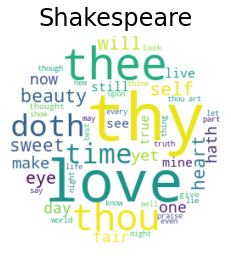

In [11]:
text = open(os.path.join(os.getcwd(), 'shakespeare.txt')).read()
wordcloud = text_to_wordcloud(text, title='Shakespeare')
obs, obs_map = parse_observations(text)

In [18]:
# unstress 0, stress 1, both 2
dictOfStresses = {}
sonnets = get_char_sonnets("shakespeare.txt", max_words=900)
syllableList = getSyllables()
#print(syllableList['stone'])
for sonnet in sonnets:
  lines = sonnet.split("\n")
  for line in lines:
    wordList = line.split()
    unstress = wordList[::2]
    stress = wordList[1::2]
    for word in unstress:
      word = word.replace("'", "")
      while word[-1] in string.punctuation:
        word = word[:-1]
      #  print(word)
      if word[0] == '(':
        word = word[1:]
      word = word[0].lower() + word[1:]
      if word in dictOfStresses and dictOfStresses[word] == 1:
        dictOfStresses[word] = 2
      else:
        dictOfStresses[word] = 0
    for word in stress:
      word = word.replace("'", "")
      #if word == '\'Will.':
      #  print(word[-1] in string.punctuation)
      while word[-1] in string.punctuation:
        word = word[:-1]
      if word[0] == '(':
        word = word[1:]
      word = word[0].lower() + word[1:]
      #  print(word)
      if word in dictOfStresses and dictOfStresses[word] == 0:
        dictOfStresses[word] = 2
      else:
        dictOfStresses[word] = 1

[1, 2]
t
[1, 2]
th


Beginning HMM1...
Train unsupervised_HMM1


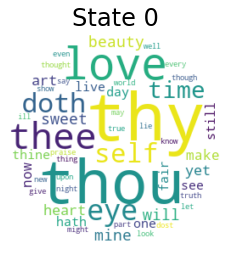

Wordclouds unsupervised_HMM1

Animating...
Animate unsupervised_HMM1


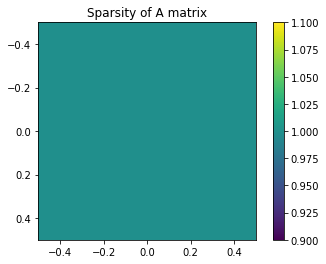

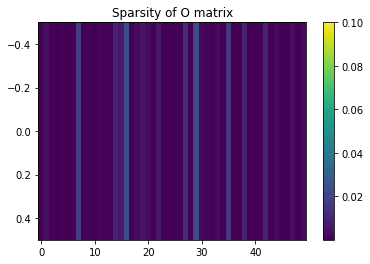

Visualize unsupervised_HMM1
state: 0
['lie', 'part', 'ill', 'new', 'even', 'night', 'well', 'truth', 'world', 'might', 'thing', 'dost', 'let', 'know', 'may', 'show', 'every', 'say', 'upon', 'give', 'true', 'though', 'praise', 'look', 'thought', 'see', 'fair', 'still', 'live', 'thine', 'one', 'hath', 'day', 'now', 'make', 'yet', 'heart', 'art', 'sweet', 'will', 'mine', 'beauty', 'time', 'self', 'doth', 'eye', 'thee', 'love', 'thou', 'thy']
50


ValueError: ignored

In [0]:
# HMM1
print("Beginning HMM1...")
hmm1 = unsupervised_HMM(obs, 1, 100)
print("Train unsupervised_HMM1")
wordclouds = states_to_wordclouds(hmm1, obs_map)

print("Wordclouds unsupervised_HMM1")
anim = animate_emission(hmm1, obs_map, M=8)
HTML(anim.to_html5_video())
print("Animate unsupervised_HMM1")
visualize_sparsities(hmm1, O_max_cols=50)
print("Visualize unsupervised_HMM1")

for i in range(len(wordclouds)):
  print("state: " + str(i))
  topTen, topAll = sortWordCloud(wordclouds[i])
  print("Top Ten")
  print(topTen)
  print("POS Analysis")
  posList = [nltk.pos_tag(nltk.word_tokenize(each))[0][1] for each in topTen]
  posFreq = {}
  for j in range(len(posList)):
    if posList[j] not in posFreq:
      posFreq[posList[j]] = 1
    else:
      posFreq[posList[j]] += 1
  
  objects = tuple(posFreq.keys())
  y_pos = np.arange(len(objects))
  freqs = posFreq.values()

  plt.bar(y_pos, freqs, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('POS appearances among the top ten words')
  plt.xlabel('POS')
  plt.title('POS appearances in state ' + str(i))

  plt.show()
  print("Stress Analysis")
  print("0 means unstress, 1 means stress, 2 means appeared as both")
  stresses = [dictOfStresses[each] if each in dictOfStresses else each + ": not found" for each in topTen]
  print([dictOfStresses[each] if each in dictOfStresses else each + ": not found" for each in topTen])
  stressesFreq = {0: 0, 1: 0, 2: 0}
  for j in range(len(stresses)):
    if stresses[j] in stressesFreq:
      stressesFreq[stresses[j]] += 1
  
  objects = tuple(stressesFreq.keys())
  y_pos = np.arange(len(objects))
  freqs = stressesFreq.values()

  plt.bar(y_pos, freqs, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('Stress value appearances among the top ten words')
  plt.xlabel('Stress value')
  plt.title('Stress appearances in state ' + str(i))

  plt.show()
  print("Syllables Analysis")
  syllbs = [syllableList[each] if each in syllableList else each + ": not found" for each in topTen]
  print([syllableList[each] if each in syllableList else each + ": not found" for each in topTen])
  sbFreq = {'1': 0, '2': 0, '3': 0, '4':0, '5':0}
  for j in range(len(syllbs)):
    if syllbs[j] in sbFreq:
      sbFreq[syllbs[j]] += 1
  
  objects = tuple(sbFreq.keys())
  y_pos = np.arange(len(objects))
  freqs = sbFreq.values()

  plt.bar(y_pos, freqs, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('Syllable value appearances among the top ten words')
  plt.xlabel('Number of syllables')
  plt.title('Stress appearances in state ' + str(i))

  plt.show()

  print("All")
  #print(topAll)
  print("POS Analysis")
  posList = [nltk.pos_tag(nltk.word_tokenize(each))[0][1] for each in topAll]
  posFreq = {}
  for j in range(len(posList)):
    if posList[j] not in posFreq:
      posFreq[posList[j]] = 1
    else:
      posFreq[posList[j]] += 1
  
  objects = tuple(posFreq.keys())
  y_pos = np.arange(len(objects))
  freqs = posFreq.values()

  plt.bar(y_pos, freqs, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('POS appearances among the top ten words')
  plt.xlabel('POS')
  plt.title('POS appearances in state ' + str(i))

  plt.show()
  print("Stress Analysis")
  print("0 means unstress, 1 means stress, 2 means appeared as both")
  stresses = [dictOfStresses[each] if each in dictOfStresses else each + ": not found" for each in topAll]
  print([dictOfStresses[each] if each in dictOfStresses else each + ": not found" for each in topAll])
  stressesFreq = {0: 0, 1: 0, 2: 0}
  for j in range(len(stresses)):
    if stresses[j] in stressesFreq:
      stressesFreq[stresses[j]] += 1
  
  objects = tuple(stressesFreq.keys())
  y_pos = np.arange(len(objects))
  freqs = stressesFreq.values()

  plt.bar(y_pos, freqs, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('Stress value appearances among the top ten words')
  plt.xlabel('Stress value')
  plt.title('Stress appearances in state ' + str(i))

  plt.show()
  print("Syllables Analysis")
  syllbs = [syllableList[each] if each in syllableList else each + ": not found" for each in topAll]
  print([syllableList[each] if each in syllableList else each + ": not found" for each in topAll])
  sbFreq = {'1': 0, '2': 0, '3': 0, '4':0, '5':0}
  for j in range(len(syllbs)):
    if syllbs[j] in sbFreq:
      sbFreq[syllbs[j]] += 1
  
  objects = tuple(sbFreq.keys())
  y_pos = np.arange(len(objects))
  freqs = sbFreq.values()

  plt.bar(y_pos, freqs, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('Syllable value appearances among the top ten words')
  plt.xlabel('Number of syllables')
  plt.title('Syllable value appearances in state ' + str(i))

  plt.show()

Beginning...
Train unsupervised_HMM8


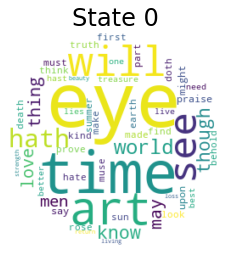

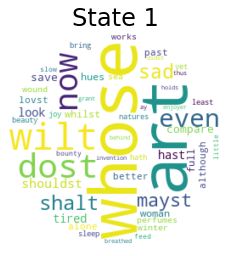

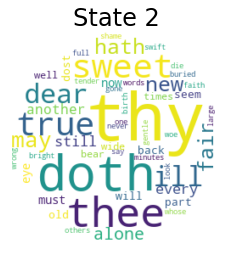

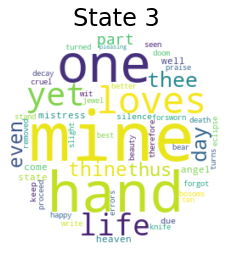

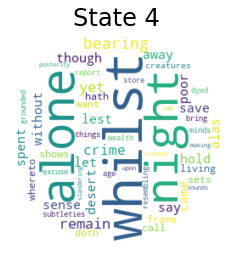

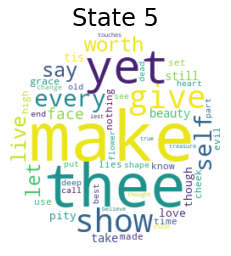

Wordclouds unsupervised_HMM8

Animating...
Animate unsupervised_HMM8


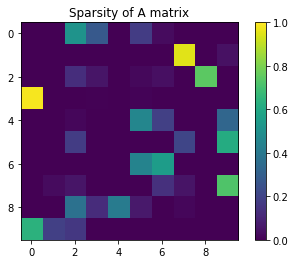

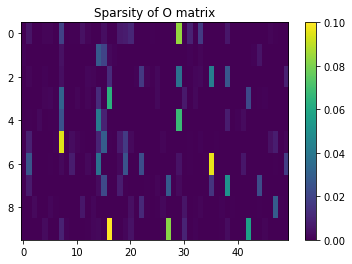

Visualize unsupervised_HMM8
state: 0
Top Ten
['thing', 'though', 'know', 'world', 'hath', 'see', 'will', 'art', 'time', 'eye']
POS Analysis


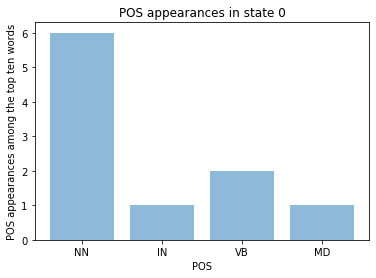

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[0, 1, 1, 1, 0, 2, 1, 0, 1, 2]


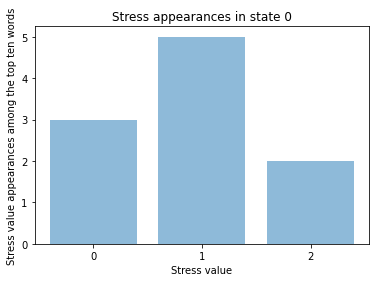

Syllables Analysis
['1', '1', '1', '1', '1', '1', '1', '1', '1', '1']


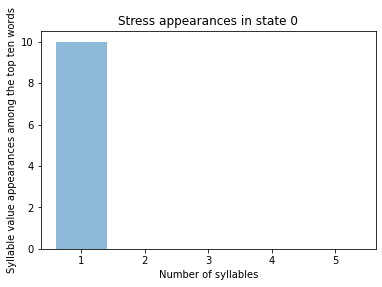

All
POS Analysis


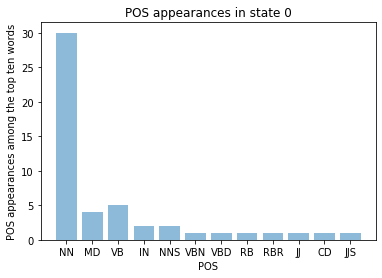

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[2, 1, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 2, 2, 1, 2, 0, 2, 1, 1, 0, 2, 0, 1, 2, 0, 2, 0, 2, 0, 1, 2, 2, 1, 1, 2, 1, 1, 0, 0]


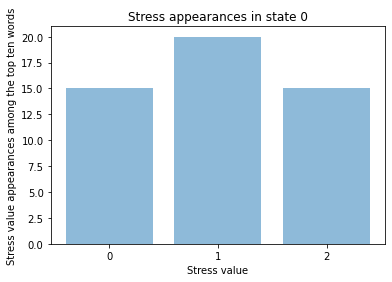

Syllables Analysis
['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1.5', '1', '1.5', '1', '1', '1', '1', '1', '2', '1', '1', '2', '2']


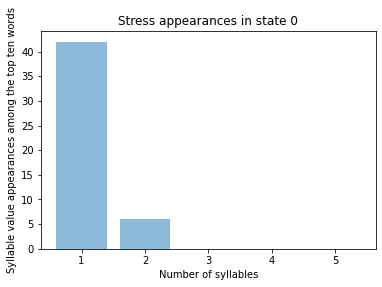

state: 1
Top Ten
['shouldst', 'mayst', 'sad', 'shalt', 'even', 'now', 'dost', 'wilt', 'art', 'whose']
POS Analysis


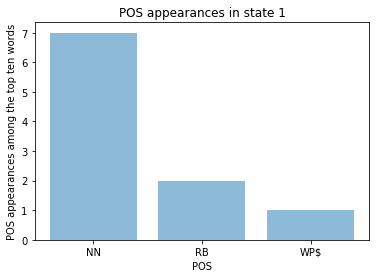

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[2, 0, 0, 2, 0, 2, 0, 0, 0, 2]


Syllables Analysis
['1', '1', '1', '1', '1.5', '1', '1', '1', '1', '1']


All
POS Analysis


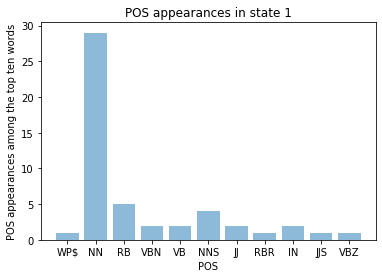

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 1, 2, 0, 2, 0, 2, 0, 1, 0, 1, 1, 2, 2, 1, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 1, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1]


Syllables Analysis
['1', '1', '1', '1', '1', '1.5', '1', '1', '1', '1', '1', '1', '1.5', '2', '1', '1', '1', '1', '2', '2', '1', '1.5', '1', '2', '2', '1', '2', '1', '1', '1', '2', '1', '1', '1', '1', '1', '2', '1', '2', '2', '1', '2', '1', '1', '1', '3', '1', '1', '3', '1']


state: 2
Top Ten
['fair', 'new', 'may', 'dear', 'ill', 'true', 'sweet', 'thee', 'doth', 'thy']
POS Analysis


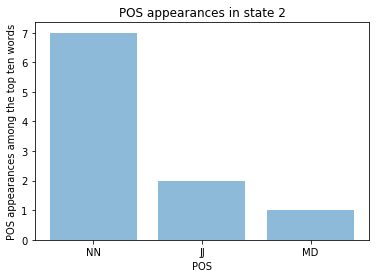

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[1, 1, 0, 0, 1, 0, 2, 2, 2, 0]


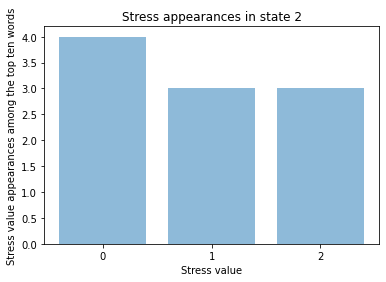

Syllables Analysis
['1', '1', '1', '1', '1', '1', '1', '1', '1', '1']


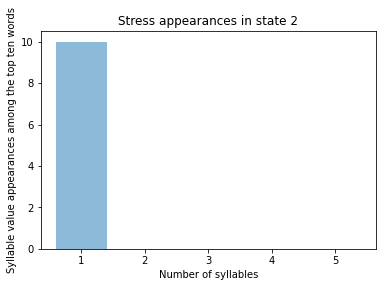

All
POS Analysis


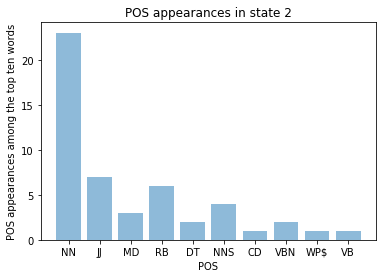

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[0, 2, 2, 2, 0, 1, 0, 0, 1, 1, 0, 0, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 0, 1, 0, 1, 1, 2, 1, 2, 2]


Syllables Analysis
['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '2', '2.5', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2.5', '2', '2', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '2', '1.5']


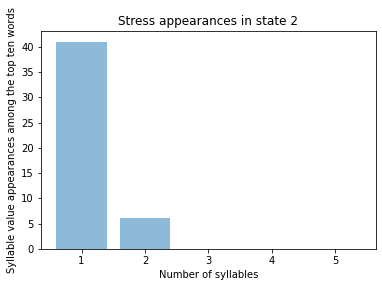

state: 3
Top Ten
['thine', 'even', 'day', 'life', 'thee', 'yet', 'loves', 'one', 'hand', 'mine']
POS Analysis


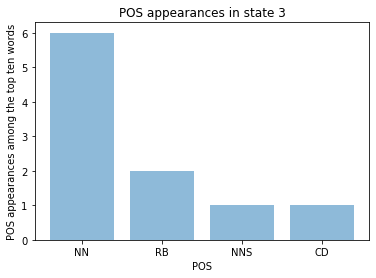

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[1, 0, 0, 0, 2, 0, 0, 2, 1, 1]


Syllables Analysis
['1', '1.5', '1', '1', '1', '1', '1', '1', '1', '1']


All
POS Analysis


Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[1, 1, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 2, 1, 1, 2, 1, 1, 0, 0, 0, 2, 2, 2, 1, 1, 0, 2, 0, 0, 1, 2, 2, 1, 1, 1, 1, 0, 0, 1, 2, 2, 1, 2, 2, 0, 0, 0, 1]


Syllables Analysis
['1', '1', '1', '1', '1', '1', '1', '1', '1.5', '1', '1', '1', '2', '1', '2', '1', '1', '1.5', '1', '2', '1', '2', '2', '1', '2', '1', '1', '1.5', '1', '1', '2', '1', '2', '2', '1', '2', '1', '2', '1', '1', '1.5', '1', '1', '1', '2', '2', '2', '1', '2', '1.5']


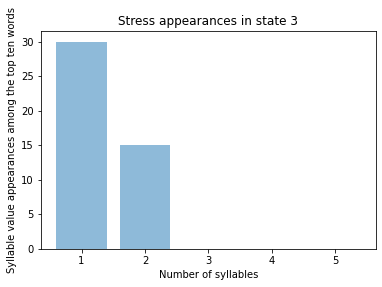

state: 4
Top Ten
['hold', 'lest', 'spent', 'crime', 'yet', 'remain', 'bearing', 'night', 'alone', 'whilst']
POS Analysis


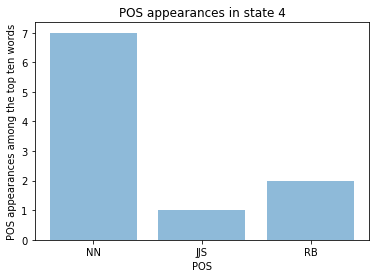

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[0, 0, 1, 0, 0, 0, 2, 2, 0, 0]


Syllables Analysis
['1', '1', '1', '1', '1', '2', '1.5', '1', '2', '1']


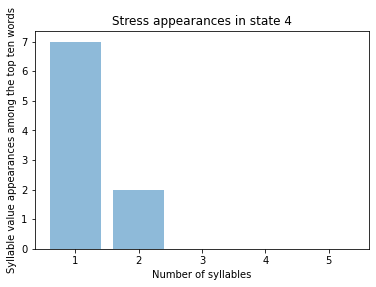

All
POS Analysis


Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 1, 0, 0]


Syllables Analysis
['1', '2', '1', '1.5', '2', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '2', '1', '2', '2', '1', '1', '2', '2', '1', '1', '1', '1', '1', '1', '1', '3', '2', '1', '1', '2', '2', '1', '2', '3', '1', '4', '1', '1', '2', '1', '3', '2', '1.5']


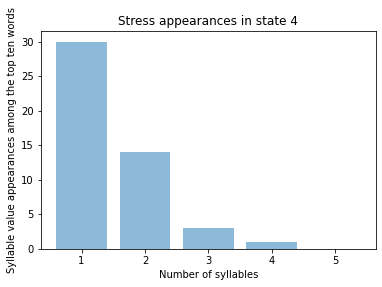

state: 5
Top Ten
['say', 'live', 'worth', 'self', 'every', 'give', 'show', 'yet', 'thee', 'make']
POS Analysis


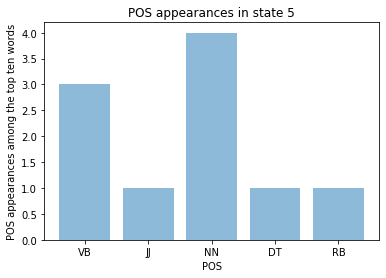

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[2, 2, 0, 1, 2, 2, 0, 0, 2, 1]


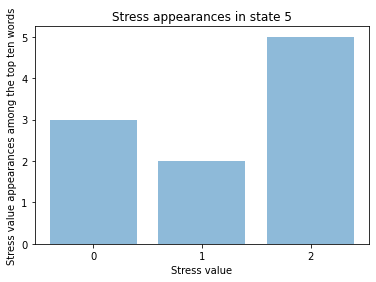

Syllables Analysis
['1', '1', '1', '1', '2', '1', '1', '1', '1', '1']


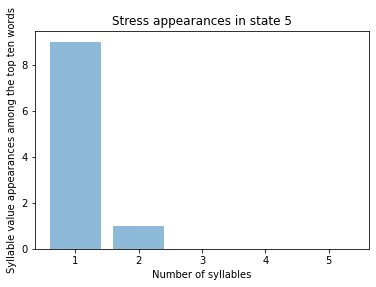

All
POS Analysis


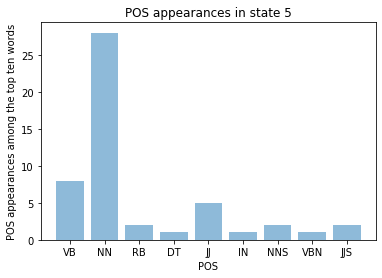

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[1, 2, 0, 0, 2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 0, 2, 0, 0, 1, 1, 2, 1, 0, 1, 0, 0, 0, 0, 2, 1]


Syllables Analysis
['1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1.5', '1.5', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1.5', '1', '1', '2', '2', '1']


state: 6
Top Ten
['fair', 'loves', 'nothing', 'upon', 'day', 'doth', 'will', 'sweet', 'beauty', 'thy']
POS Analysis


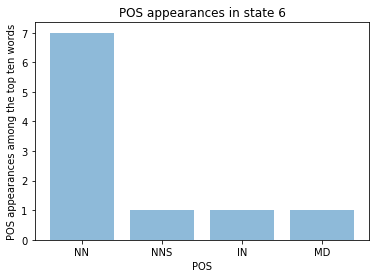

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[1, 0, 1, 2, 0, 2, 1, 2, 2, 0]


Syllables Analysis
['1', '1', '1.5', '2', '1', '1', '1', '1', '2', '1']


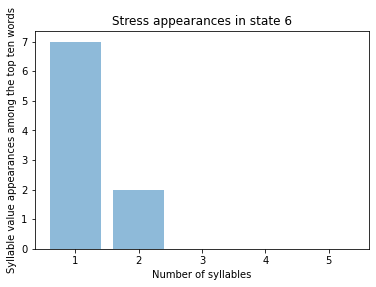

All
POS Analysis


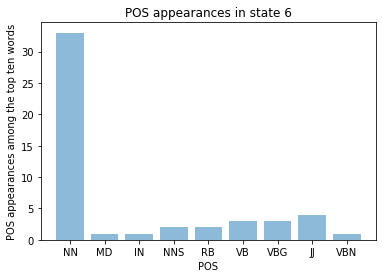

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[0, 2, 2, 1, 2, 0, 2, 1, 0, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 0, 2, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 1, 0, 0, 2, 2, 1, 1, 2, 1]


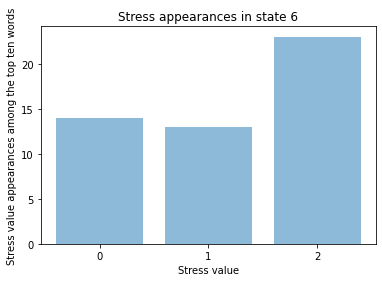

Syllables Analysis
['1', '2', '1', '1', '1', '1', '2', '1.5', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1.5', '1.5', '1', '1', '1', '1', '0', '1', '1', '2', '2', '1', '3', '1.5', '1', '1', '1', '2', '1', '2.5', '1', '1', '1.5', '1', '1', '1', '1', '2', '2', '1.5', '2', '2', '2']


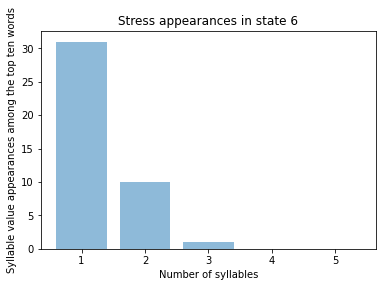

state: 7
Top Ten
['unless', 'within', 'beauteous', 'fair', 'dost', 'till', 'now', 'many', 'thy', 'thou']
POS Analysis


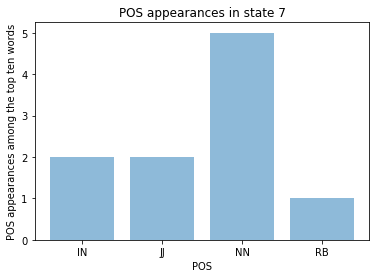

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[0, 0, 1, 1, 0, 0, 2, 1, 0, 1]


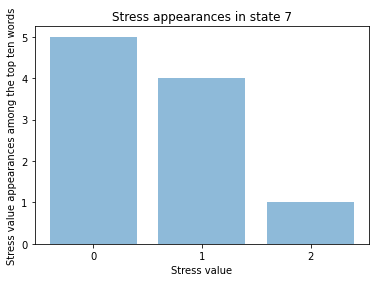

Syllables Analysis
['2', '2', '2', '1', '1', '1', '1', '1.5', '1', '1']


All
POS Analysis


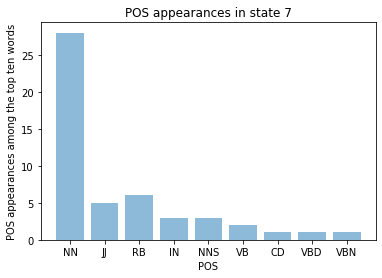

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[1, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 2, 0, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 0, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 0, 1, 1, 0, 0, 2]


Syllables Analysis
['1', '1', '1.5', '1', '1', '1', '1', '2', '2', '2', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '2', '2', '2', '1', '1', '1', '1', '1.5', '1.5', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1.5', '1', '1']


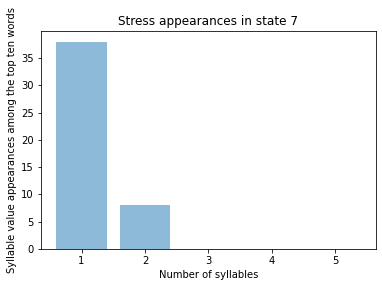

state: 8
Top Ten
['might', 'time', 'verse', 'thought', 'beauty', 'sight', 'thee', 'heart', 'self', 'love']
POS Analysis


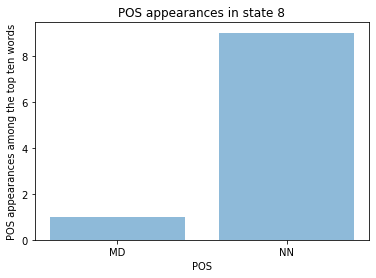

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[0, 1, 2, 1, 2, 2, 2, 1, 1, 1]


Syllables Analysis
['1', '1', '1', '1', '2', '1', '1', '1', '1', '1']


All
POS Analysis


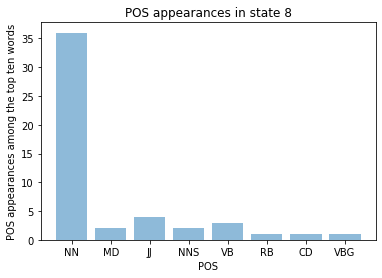

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 1, 1, 2, 0, 0, 0, 2, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 0, 0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2]


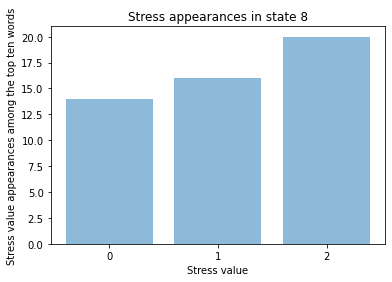

Syllables Analysis
['1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1.5', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']


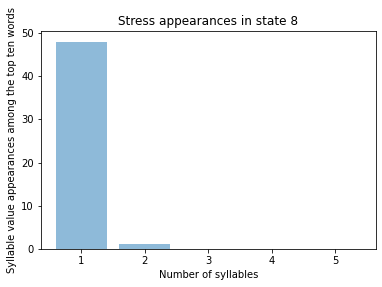

state: 9
Top Ten
['still', 'summer', 'youth', 'one', 'therefore', 'time', 'thine', 'mine', 'thee', 'thou']
POS Analysis


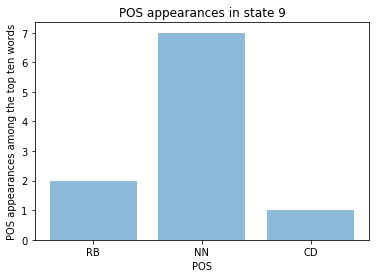

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[2, 2, 1, 2, 2, 1, 1, 1, 2, 1]


Syllables Analysis
['1', '2', '1', '1', '2', '1', '1', '1', '1', '1']


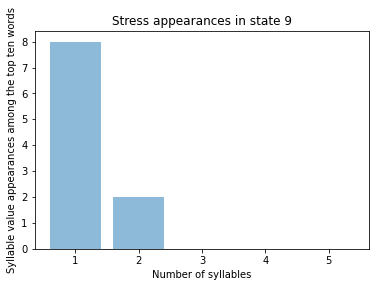

All
POS Analysis


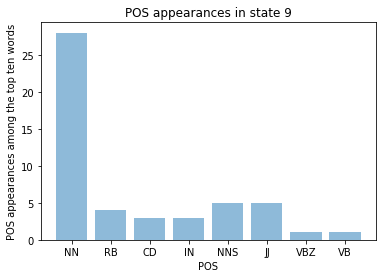

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 0, 2, 1, 2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 2, 0]


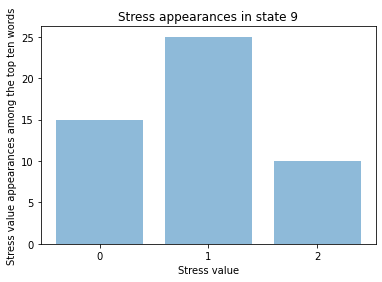

Syllables Analysis
['1', '1', '1', '1', '1', '2', '1', '1', '2', '1', '1.5', '1', '2', '1', '2', '1.5', '1', '1', '2', '1', '1', '2', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '3', '2', '1', '1.5', '1', '1', '1', '2', '1', '1', '1', '1', '2', '1', '2', '1', '2']


In [14]:
#obs, obs_map = parse_observations(text)
# HMM8
print("Beginning...")
hmm8 = unsupervised_HMM(obs, 10, 100)
print("Train unsupervised_HMM8")
wordclouds = states_to_wordclouds(hmm8, obs_map)
print("Wordclouds unsupervised_HMM8")
anim = animate_emission(hmm8, obs_map, M=8)
HTML(anim.to_html5_video())
print("Animate unsupervised_HMM8")
visualize_sparsities(hmm8, O_max_cols=50)
print("Visualize unsupervised_HMM8")

for i in range(len(wordclouds)):
  print("state: " + str(i))
  topTen, topAll = sortWordCloud(wordclouds[i])
  print("Top Ten")
  print(topTen)
  print("POS Analysis")
  posList = [nltk.pos_tag(nltk.word_tokenize(each))[0][1] for each in topTen]
  posFreq = {}
  for j in range(len(posList)):
    if posList[j] not in posFreq:
      posFreq[posList[j]] = 1
    else:
      posFreq[posList[j]] += 1
  
  objects = tuple(posFreq.keys())
  y_pos = np.arange(len(objects))
  freqs = posFreq.values()

  plt.bar(y_pos, freqs, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('POS appearances among the top ten words')
  plt.xlabel('POS')
  plt.title('POS appearances in state ' + str(i))

  plt.show()
  print("Stress Analysis")
  print("0 means unstress, 1 means stress, 2 means appeared as both")
  stresses = [dictOfStresses[each] if each in dictOfStresses else each + ": not found" for each in topTen]
  print([dictOfStresses[each] if each in dictOfStresses else each + ": not found" for each in topTen])
  stressesFreq = {0: 0, 1: 0, 2: 0}
  for j in range(len(stresses)):
    if stresses[j] in stressesFreq:
      stressesFreq[stresses[j]] += 1
  
  objects = tuple(stressesFreq.keys())
  y_pos = np.arange(len(objects))
  freqs = stressesFreq.values()

  plt.bar(y_pos, freqs, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('Stress value appearances among the top ten words')
  plt.xlabel('Stress value')
  plt.title('Stress appearances in state ' + str(i))

  plt.show()
  print("Syllables Analysis")
  syllbs = [syllableList[each] if each in syllableList else each + ": not found" for each in topTen]
  print([syllableList[each] if each in syllableList else each + ": not found" for each in topTen])
  sbFreq = {'1': 0, '2': 0, '3': 0, '4':0, '5':0}
  for j in range(len(syllbs)):
    if syllbs[j] in sbFreq:
      sbFreq[syllbs[j]] += 1
  
  objects = tuple(sbFreq.keys())
  y_pos = np.arange(len(objects))
  freqs = sbFreq.values()

  plt.bar(y_pos, freqs, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('Syllable value appearances among the top ten words')
  plt.xlabel('Number of syllables')
  plt.title('Stress appearances in state ' + str(i))

  plt.show()

  print("All")
  #print(topAll)
  print("POS Analysis")
  posList = [nltk.pos_tag(nltk.word_tokenize(each))[0][1] for each in topAll]
  posFreq = {}
  for j in range(len(posList)):
    if posList[j] not in posFreq:
      posFreq[posList[j]] = 1
    else:
      posFreq[posList[j]] += 1
  
  objects = tuple(posFreq.keys())
  y_pos = np.arange(len(objects))
  freqs = posFreq.values()

  plt.bar(y_pos, freqs, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('POS appearances among the top ten words')
  plt.xlabel('POS')
  plt.title('POS appearances in state ' + str(i))

  plt.show()
  print("Stress Analysis")
  print("0 means unstress, 1 means stress, 2 means appeared as both")
  stresses = [dictOfStresses[each] if each in dictOfStresses else each + ": not found" for each in topAll]
  print([dictOfStresses[each] if each in dictOfStresses else each + ": not found" for each in topAll])
  stressesFreq = {0: 0, 1: 0, 2: 0}
  for j in range(len(stresses)):
    if stresses[j] in stressesFreq:
      stressesFreq[stresses[j]] += 1
  
  objects = tuple(stressesFreq.keys())
  y_pos = np.arange(len(objects))
  freqs = stressesFreq.values()

  plt.bar(y_pos, freqs, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('Stress value appearances among the top ten words')
  plt.xlabel('Stress value')
  plt.title('Stress appearances in state ' + str(i))

  plt.show()
  print("Syllables Analysis")
  syllbs = [syllableList[each] if each in syllableList else each + ": not found" for each in topAll]
  print([syllableList[each] if each in syllableList else each + ": not found" for each in topAll])
  sbFreq = {'1': 0, '2': 0, '3': 0, '4':0, '5':0}
  for j in range(len(syllbs)):
    if syllbs[j] in sbFreq:
      sbFreq[syllbs[j]] += 1
  
  objects = tuple(sbFreq.keys())
  y_pos = np.arange(len(objects))
  freqs = sbFreq.values()

  plt.bar(y_pos, freqs, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('Syllable value appearances among the top ten words')
  plt.xlabel('Number of syllables')
  plt.title('Stress appearances in state ' + str(i))

  plt.show()

In [0]:
# HMM2
print("Beginning HMM2...")
hmm2 = unsupervised_HMM(obs, 2, 100)
print("Train unsupervised_HMM2")
wordclouds = states_to_wordclouds(hmm2, obs_map)
print("Wordclouds unsupervised_HMM2")
anim = animate_emission(hmm2, obs_map, M=8)
HTML(anim.to_html5_video())
print("Animate unsupervised_HMM2")
visualize_sparsities(hmm2, O_max_cols=50)
print("Visualize unsupervised_HMM2")

for i in range(len(wordclouds)):
  print("state: " + str(i))
  topTen = sortWordCloud(wordclouds[i])
  print(topTen)
  print("POS Analysis")
  posList = [nltk.pos_tag(nltk.word_tokenize(each))[0][1] for each in topTen]
  posFreq = {}
  for j in range(len(posList)):
    if posList[j] not in posFreq:
      posFreq[posList[j]] = 1
    else:
      posFreq[posList[j]] += 1
  
  objects = tuple(posFreq.keys())
  y_pos = np.arange(len(objects))
  freqs = posFreq.values()

  plt.bar(y_pos, freqs, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('POS appearances among the top ten words')
  plt.title('POS appearances in state ' + str(i))

  plt.show()
  print("Stress Analysis")
  print("0 means unstress, 1 means stress, 2 means appeared as both")
  stresses = [dictOfStresses[each] if each in dictOfStresses else each + ": not found" for each in topTen]
  print([dictOfStresses[each] if each in dictOfStresses else each + ": not found" for each in topTen])
  stressesFreq = {0: 0, 1: 0, 2: 0}
  for j in range(len(stresses)):
    if stresses[j] in stressesFreq:
      stressesFreq[stresses[j]] += 1
  
  objects = tuple(stressesFreq.keys())
  y_pos = np.arange(len(objects))
  freqs = stressesFreq.values()

  plt.bar(y_pos, freqs, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('Stress appearances among the top ten words')
  plt.title('Stress appearances in state ' + str(i))

  plt.show()
  print("Syllables Analysis")
  syllbs = [syllableList[each] if each in syllableList else each + ": not found" for each in topTen]
  print([syllableList[each] if each in syllableList else each + ": not found" for each in topTen])
  sbFreq = {'1': 0, '2': 0, '3': 0, '4':0, '5':0}
  for j in range(len(syllbs)):
    if syllbs[j] in sbFreq:
      sbFreq[syllbs[j]] += 1
  
  objects = tuple(sbFreq.keys())
  y_pos = np.arange(len(objects))
  freqs = sbFreq.values()

  plt.bar(y_pos, freqs, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('Syllables value appearances among the top ten words')
  plt.title('Syllables appearances in state ' + str(i))

  plt.show()

Beginning HMM2...


KeyboardInterrupt: ignored

Beginning HMM4...
Train unsupervised_HMM4


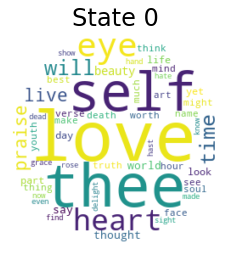

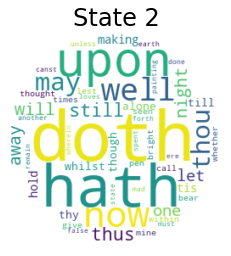

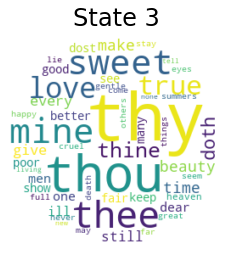

Wordclouds unsupervised_HMM4

Animating...
Animate unsupervised_HMM4


Visualize unsupervised_HMM4
state: 0
['beauty', 'live', 'praise', 'time', 'will', 'heart', 'eye', 'self', 'thee', 'love']
POS Analysis


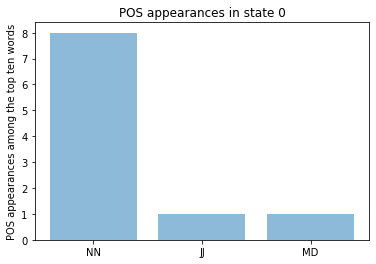

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[2, 2, 1, 1, 1, 1, 2, 1, 0, 2]


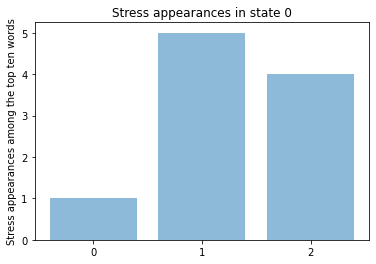

Syllables Analysis
['2', '1', '1', '1', '1', '1', '1', '1', '1', '1']


state: 1
['though', 'therefore', 'old', 'fair', 'let', 'thy', 'eye', 'yet', 'art', 'thou']
POS Analysis


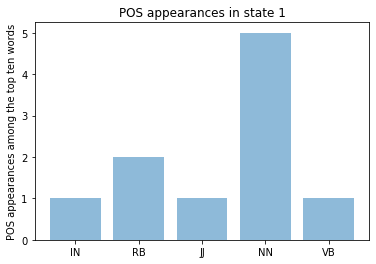

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[1, 1, 0, 2, 1, 0, 2, 0, 0, 1]


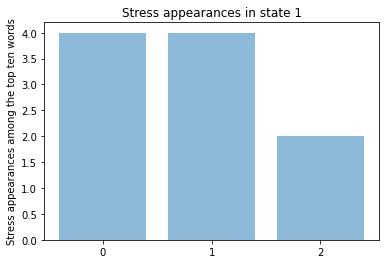

Syllables Analysis
['1', '2', '1', '1', '1', '1', '1', '1', '1', '1']


state: 2
['night', 'thus', 'still', 'thou', 'may', 'well', 'now', 'upon', 'hath', 'doth']
POS Analysis


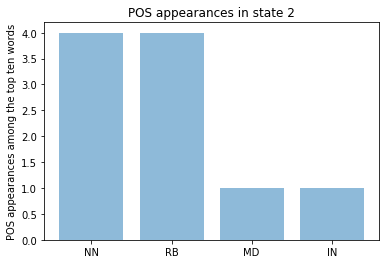

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[2, 1, 2, 1, 0, 1, 2, 2, 2, 2]


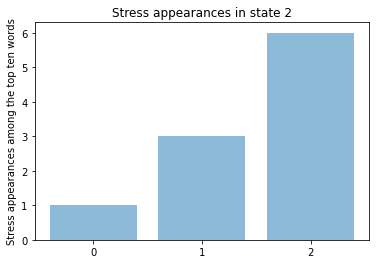

Syllables Analysis
['1', '1', '1', '1', '1', '1', '1', '2', '1', '1']


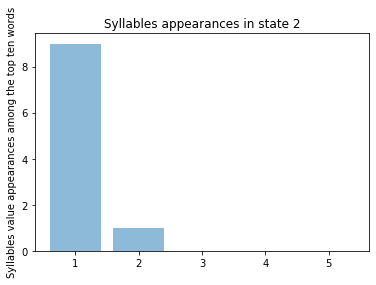

state: 3
['beauty', 'doth', 'thine', 'true', 'love', 'mine', 'sweet', 'thee', 'thou', 'thy']
POS Analysis


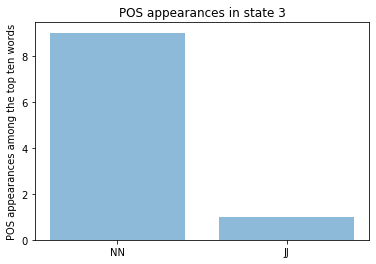

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[2, 2, 1, 0, 2, 2, 0, 0, 1, 0]


Syllables Analysis
['2', '1', '1', '1', '1', '1', '1', '1', '1', '1']


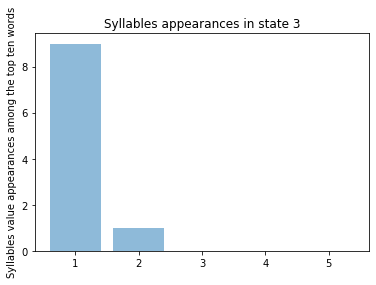

In [0]:
# HMM4
print("Beginning HMM4...")
hmm4 = unsupervised_HMM(obs, 4, 100)
print("Train unsupervised_HMM4")
wordclouds = states_to_wordclouds(hmm4, obs_map)
print("Wordclouds unsupervised_HMM4")
anim = animate_emission(hmm4, obs_map, M=8)
HTML(anim.to_html5_video())
print("Animate unsupervised_HMM4")
visualize_sparsities(hmm4, O_max_cols=50)
print("Visualize unsupervised_HMM4")

for i in range(len(wordclouds)):
  print("state: " + str(i))
  topTen = sortWordCloud(wordclouds[i])
  print(topTen)
  print("POS Analysis")
  posList = [nltk.pos_tag(nltk.word_tokenize(each))[0][1] for each in topTen]
  posFreq = {}
  for j in range(len(posList)):
    if posList[j] not in posFreq:
      posFreq[posList[j]] = 1
    else:
      posFreq[posList[j]] += 1
  
  objects = tuple(posFreq.keys())
  y_pos = np.arange(len(objects))
  freqs = posFreq.values()

  plt.bar(y_pos, freqs, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('POS appearances among the top ten words')
  plt.title('POS appearances in state ' + str(i))

  plt.show()
  print("Stress Analysis")
  print("0 means unstress, 1 means stress, 2 means appeared as both")
  stresses = [dictOfStresses[each] if each in dictOfStresses else each + ": not found" for each in topTen]
  print([dictOfStresses[each] if each in dictOfStresses else each + ": not found" for each in topTen])
  stressesFreq = {0: 0, 1: 0, 2: 0}
  for j in range(len(stresses)):
    if stresses[j] in stressesFreq:
      stressesFreq[stresses[j]] += 1
  
  objects = tuple(stressesFreq.keys())
  y_pos = np.arange(len(objects))
  freqs = stressesFreq.values()

  plt.bar(y_pos, freqs, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('Stress appearances among the top ten words')
  plt.title('Stress appearances in state ' + str(i))

  plt.show()
  print("Syllables Analysis")
  syllbs = [syllableList[each] if each in syllableList else each + ": not found" for each in topTen]
  print([syllableList[each] if each in syllableList else each + ": not found" for each in topTen])
  sbFreq = {'1': 0, '2': 0, '3': 0, '4':0, '5':0}
  for j in range(len(syllbs)):
    if syllbs[j] in sbFreq:
      sbFreq[syllbs[j]] += 1
  
  objects = tuple(sbFreq.keys())
  y_pos = np.arange(len(objects))
  freqs = sbFreq.values()

  plt.bar(y_pos, freqs, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('Syllables value appearances among the top ten words')
  plt.title('Syllables appearances in state ' + str(i))

  plt.show()

Beginning HMM16...
Train unsupervised_HMM16


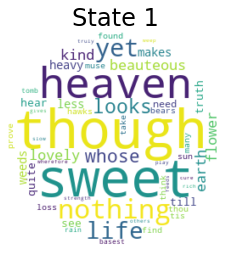

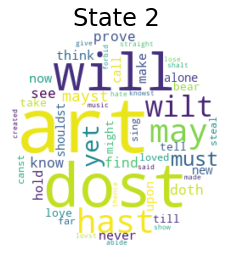

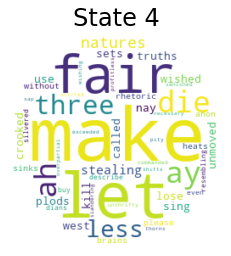

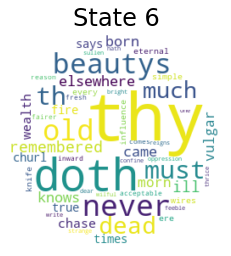

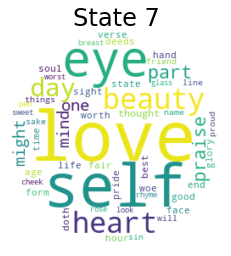

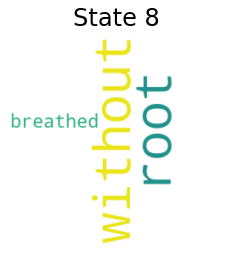

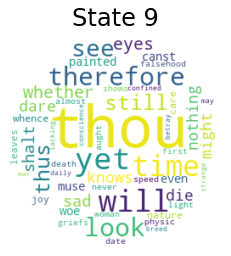

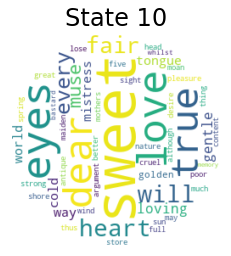

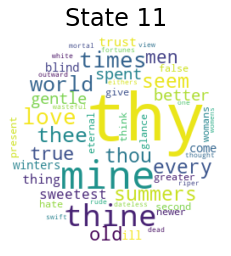

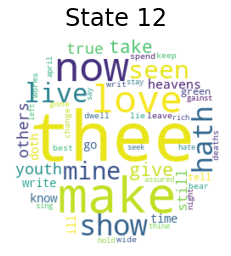

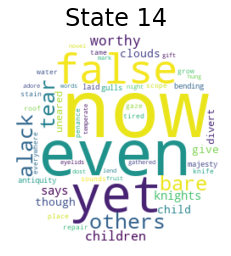

Wordclouds unsupervised_HMM16

Animating...
Animate unsupervised_HMM16


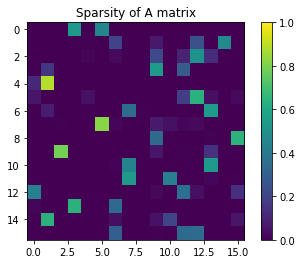

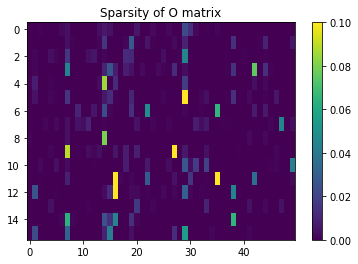

Visualize unsupervised_HMM16
state: 0
['even', 'praise', 'one', 'fair', 'thus', 'thine', 'time', 'love', 'world', 'thee']
POS Analysis


LookupError: ignored

In [0]:
# HMM16
print("Beginning HMM16...")
hmm16 = unsupervised_HMM(obs, 16, 100)
print("Train unsupervised_HMM16")
wordclouds = states_to_wordclouds(hmm16, obs_map)
print("Wordclouds unsupervised_HMM16")
anim = animate_emission(hmm16, obs_map, M=8)
HTML(anim.to_html5_video())
print("Animate unsupervised_HMM16")
visualize_sparsities(hmm16, O_max_cols=50)
print("Visualize unsupervised_HMM16")

for i in range(len(wordclouds)):
  print("state: " + str(i))
  topTen = sortWordCloud(wordclouds[i])
  print(topTen)
  print("POS Analysis")
  posList = [nltk.pos_tag(nltk.word_tokenize(each))[0][1] for each in topTen]
  posFreq = {}
  for j in range(len(posList)):
    if posList[j] not in posFreq:
      posFreq[posList[j]] = 1
    else:
      posFreq[posList[j]] += 1
  
  objects = tuple(posFreq.keys())
  y_pos = np.arange(len(objects))
  freqs = posFreq.values()

  plt.bar(y_pos, freqs, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('POS appearances among the top ten words')
  plt.title('POS appearances in state ' + str(i))

  plt.show()
  print("Stress Analysis")
  print("0 means unstress, 1 means stress, 2 means appeared as both")
  stresses = [dictOfStresses[each] if each in dictOfStresses else each + ": not found" for each in topTen]
  print([dictOfStresses[each] if each in dictOfStresses else each + ": not found" for each in topTen])
  stressesFreq = {0: 0, 1: 0, 2: 0}
  for j in range(len(stresses)):
    if stresses[j] in stressesFreq:
      stressesFreq[stresses[j]] += 1
  
  objects = tuple(stressesFreq.keys())
  y_pos = np.arange(len(objects))
  freqs = stressesFreq.values()

  plt.bar(y_pos, freqs, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('Stress appearances among the top ten words')
  plt.title('Stress appearances in state ' + str(i))

  plt.show()
  print("Syllables Analysis")
  syllbs = [syllableList[each] if each in syllableList else each + ": not found" for each in topTen]
  print([syllableList[each] if each in syllableList else each + ": not found" for each in topTen])
  sbFreq = {'1': 0, '2': 0, '3': 0, '4':0, '5':0}
  for j in range(len(syllbs)):
    if syllbs[j] in sbFreq:
      sbFreq[syllbs[j]] += 1
  
  objects = tuple(sbFreq.keys())
  y_pos = np.arange(len(objects))
  freqs = sbFreq.values()

  plt.bar(y_pos, freqs, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('Syllables value appearances among the top ten words')
  plt.title('Syllables appearances in state ' + str(i))

  plt.show()

state: 0
['even', 'praise', 'one', 'fair', 'thus', 'thine', 'time', 'love', 'world', 'thee']
POS Analysis


Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[0, 1, 1, 2, 1, 1, 1, 2, 1, 0]


Syllables Analysis
['even: not found', '1', '1', '1', '1', '1', '1', '1', '1', '1']


state: 1
['less', 'beauteous', 'whose', 'looks', 'life', 'yet', 'nothing', 'heaven', 'sweet', 'though']
POS Analysis


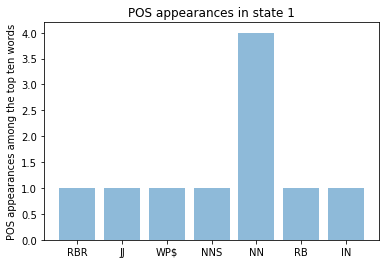

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[1, 1, 2, 2, 2, 0, 1, 1, 0, 1]


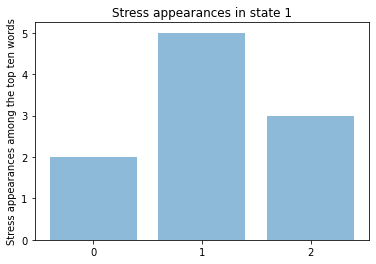

Syllables Analysis
['1', '2', '1', '1', '1', '1', 'nothing: not found', 'heaven: not found', '1', '1']


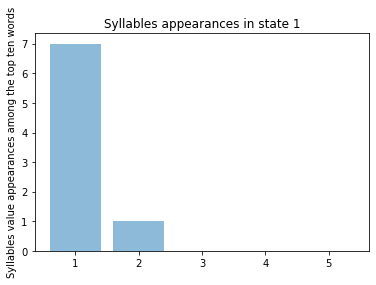

state: 2
['know', 'must', 'mayst', 'yet', 'wilt', 'may', 'hast', 'will', 'dost', 'art']
POS Analysis


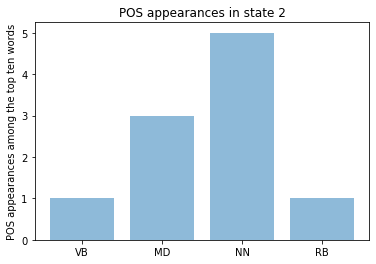

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[1, 1, 0, 0, 0, 0, 2, 1, 2, 0]


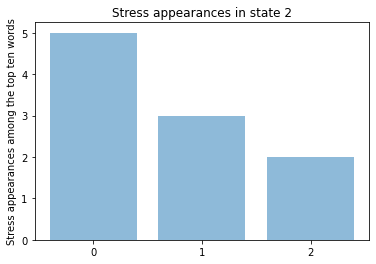

Syllables Analysis
['1', '1', '1', '1', '1', '1', '1', '1', '1', '1']


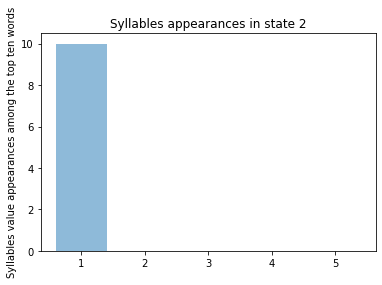

state: 3
['leaves', 'ere', 'now', 'till', 'far', 'though', 'upon', 'well', 'thou', 'doth']
POS Analysis


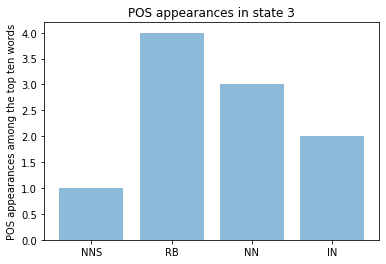

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[1, 2, 2, 0, 0, 1, 2, 1, 1, 2]


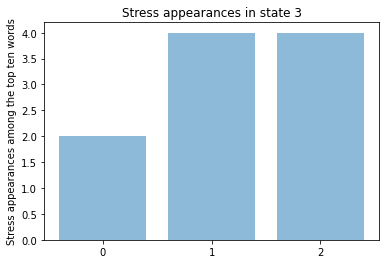

Syllables Analysis
['1', '1', '1', '1', '1', '1', '2', '1', '1', '1']


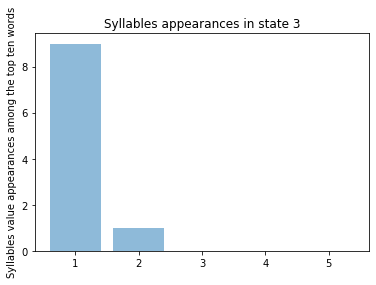

state: 4
['less', 'natures', 'stealing', 'die', 'ay', 'ah', 'three', 'fair', 'let', 'make']
POS Analysis


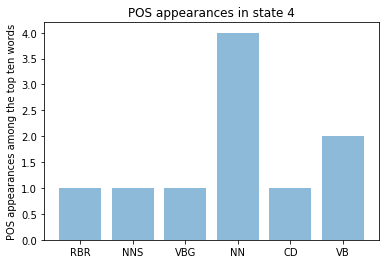

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[1, 'natures: not found', 'stealing: not found', 1, 'ay: not found', 0, 1, 2, 1, 1]


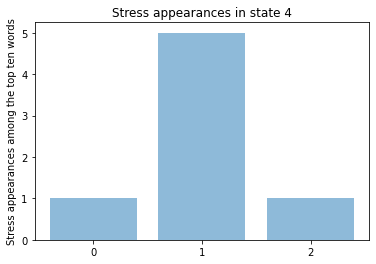

Syllables Analysis
['1', 'natures: not found', '2', '1', '1', '1', '1', '1', '1', '1']


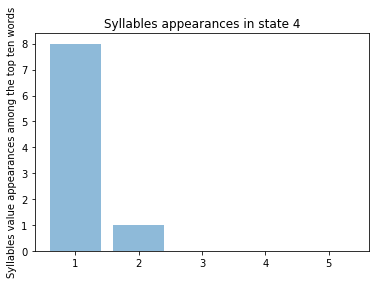

state: 5
['another', 'hate', 'give', 'alone', 'will', 'upon', 'lie', 'still', 'doth', 'hath']
POS Analysis


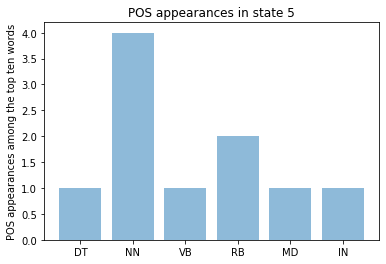

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[1, 1, 1, 0, 1, 2, 1, 2, 2, 2]


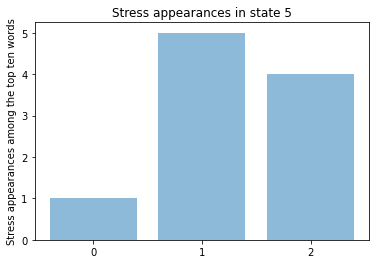

Syllables Analysis
['another: not found', '1', '1', '2', '1', '2', '1', '1', '1', '1']


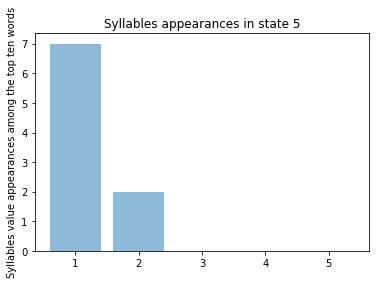

state: 6
['remembered', 'much', 'dead', 'must', 'th', 'beautys', 'old', 'never', 'doth', 'thy']
POS Analysis


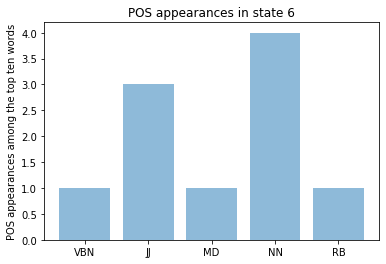

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[0, 1, 2, 1, 'th: not found', 'beautys: not found', 0, 1, 2, 0]


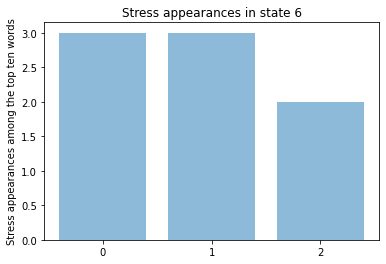

Syllables Analysis
['remembered: not found', '1', '1', '1', 'th: not found', 'beautys: not found', '1', 'never: not found', '1', '1']


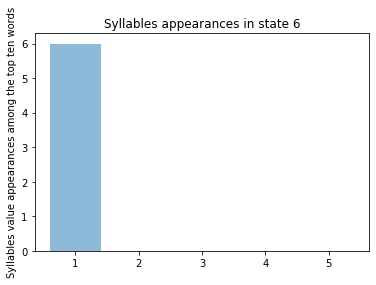

state: 7
['one', 'might', 'praise', 'part', 'day', 'heart', 'beauty', 'eye', 'self', 'love']
POS Analysis


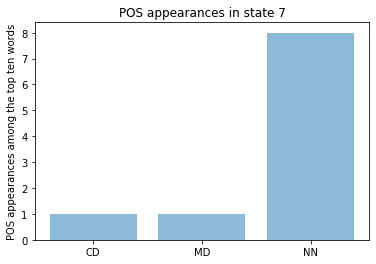

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[1, 0, 1, 2, 2, 1, 2, 2, 1, 2]


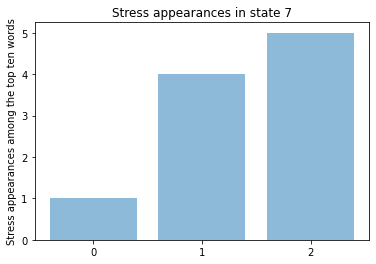

Syllables Analysis
['1', '1', '1', '1', '1', '1', '2', '1', '1', '1']


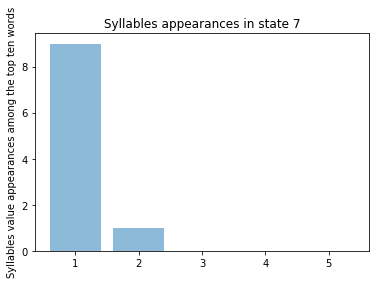

state: 8
['without', 'root', 'breathed']
POS Analysis


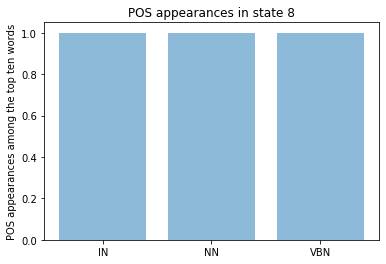

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[1, 0, 'breathed: not found']


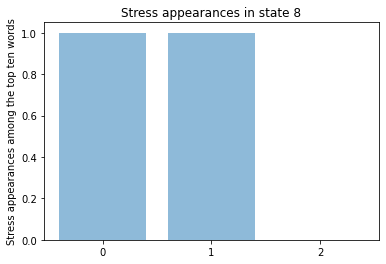

Syllables Analysis
['2', '1', '1']


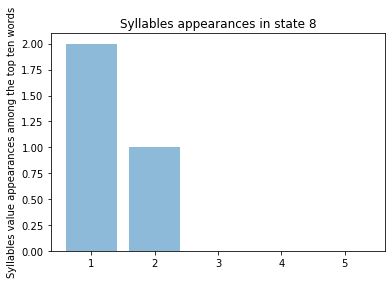

state: 9
['whether', 'still', 'thus', 'see', 'therefore', 'look', 'time', 'will', 'yet', 'thou']
POS Analysis


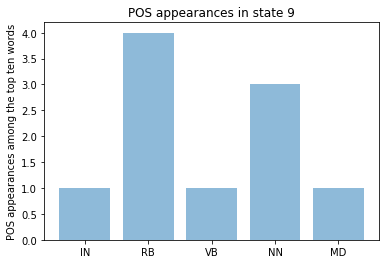

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[1, 2, 1, 1, 1, 2, 1, 1, 0, 1]


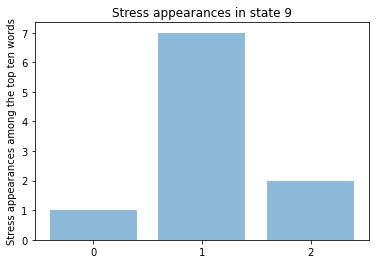

Syllables Analysis
['whether: not found', '1', '1', '1', '2', '1', '1', '1', '1', '1']


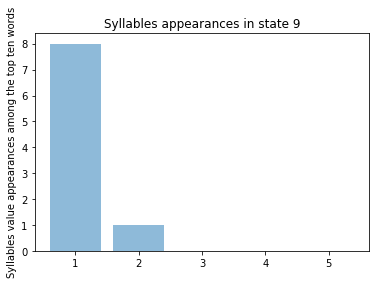

state: 10
['muse', 'every', 'fair', 'will', 'heart', 'true', 'dear', 'love', 'eyes', 'sweet']
POS Analysis


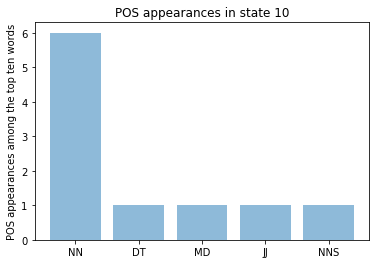

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[0, 2, 2, 1, 1, 0, 0, 2, 1, 0]


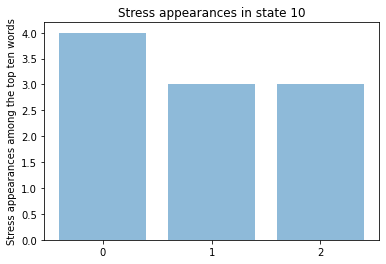

Syllables Analysis
['1', '2', '1', '1', '1', '1', '1', '1', '1', '1']


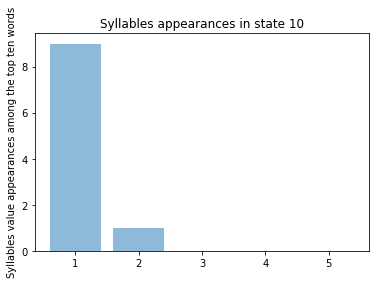

state: 11
['summers', 'every', 'seem', 'world', 'thee', 'times', 'love', 'thine', 'mine', 'thy']
POS Analysis


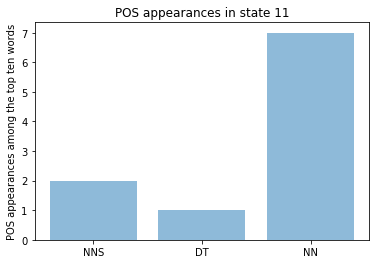

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
['summers: not found', 2, 2, 1, 0, 2, 2, 1, 2, 0]


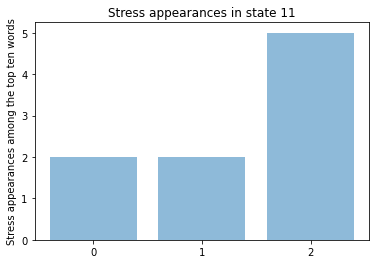

Syllables Analysis
['2', '2', '1', '1', '1', '1', '1', '1', '1', '1']


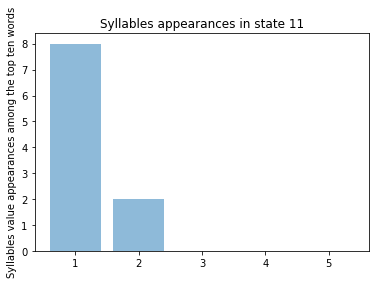

state: 12
['give', 'mine', 'seen', 'live', 'hath', 'show', 'love', 'now', 'make', 'thee']
POS Analysis


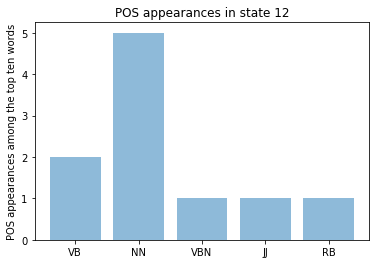

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[1, 2, 2, 2, 2, 0, 2, 2, 1, 0]


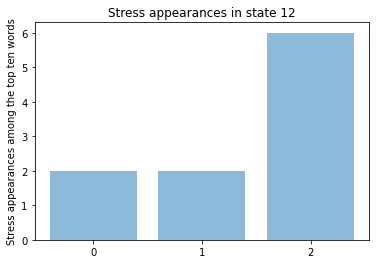

Syllables Analysis
['1', '1', '1', '1', '1', '1', '1', '1', '1', '1']


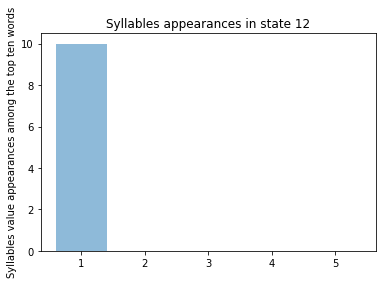

state: 13
['fair', 'none', 'made', 'thee', 'every', 'eyes', 'live', 'night', 'time', 'love']
POS Analysis


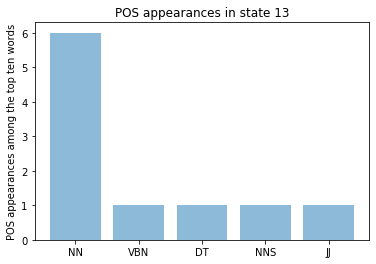

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[2, 1, 1, 0, 2, 1, 2, 2, 1, 2]


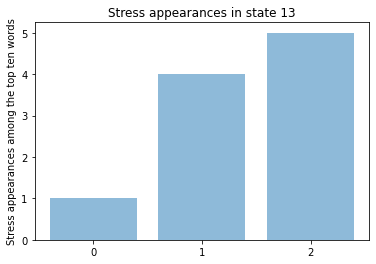

Syllables Analysis
['1', '1', '1', '1', '2', '1', '1', '1', '1', '1']


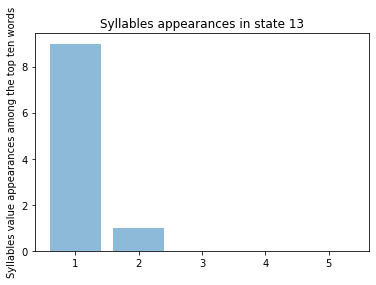

state: 14
['knights', 'says', 'bare', 'others', 'alack', 'tear', 'false', 'yet', 'even', 'now']
POS Analysis


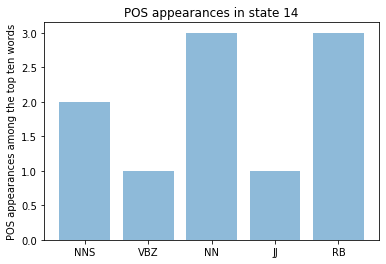

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
['knights: not found', 2, 1, 1, 'alack: not found', 0, 0, 0, 0, 2]


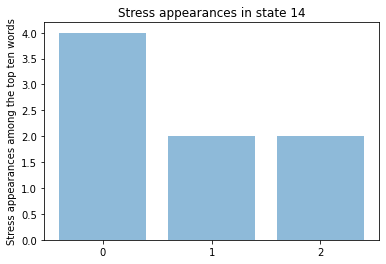

Syllables Analysis
['1', '1', '1', '2', '2', '1', '1', '1', 'even: not found', '1']


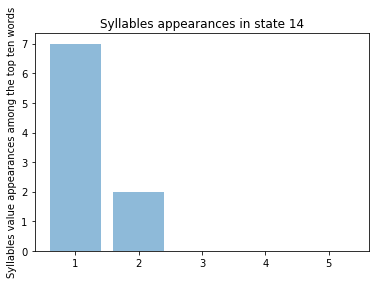

state: 15
['pity', 'rest', 'lest', 'fear', 'one', 'therefore', 'say', 'within', 'thou', 'let']
POS Analysis


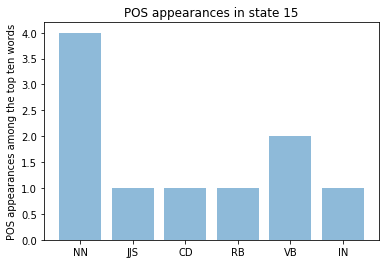

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[1, 1, 1, 1, 1, 1, 2, 0, 1, 1]


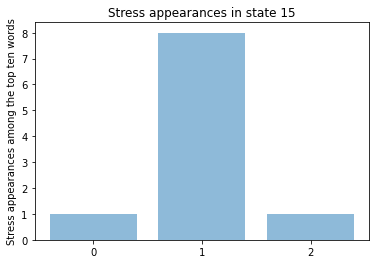

Syllables Analysis
['2', '1', '1', '1', '1', '2', '1', '2', '1', '1']


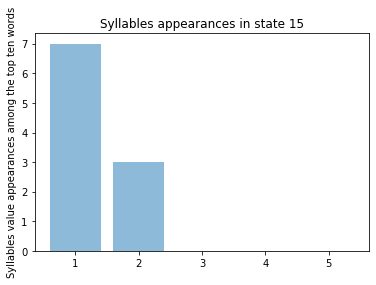

In [0]:
for i in range(len(wordclouds)):
  print("state: " + str(i))
  topTen = sortWordCloud(wordclouds[i])
  print(topTen)
  print("POS Analysis")
  posList = [nltk.pos_tag(nltk.word_tokenize(each))[0][1] for each in topTen]
  posFreq = {}
  for j in range(len(posList)):
    if posList[j] not in posFreq:
      posFreq[posList[j]] = 1
    else:
      posFreq[posList[j]] += 1
  
  objects = tuple(posFreq.keys())
  y_pos = np.arange(len(objects))
  freqs = posFreq.values()

  plt.bar(y_pos, freqs, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('POS appearances among the top ten words')
  plt.title('POS appearances in state ' + str(i))

  plt.show()
  print("Stress Analysis")
  print("0 means unstress, 1 means stress, 2 means appeared as both")
  stresses = [dictOfStresses[each] if each in dictOfStresses else each + ": not found" for each in topTen]
  print([dictOfStresses[each] if each in dictOfStresses else each + ": not found" for each in topTen])
  stressesFreq = {0: 0, 1: 0, 2: 0}
  for j in range(len(stresses)):
    if stresses[j] in stressesFreq:
      stressesFreq[stresses[j]] += 1
  
  objects = tuple(stressesFreq.keys())
  y_pos = np.arange(len(objects))
  freqs = stressesFreq.values()

  plt.bar(y_pos, freqs, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('Stress appearances among the top ten words')
  plt.title('Stress appearances in state ' + str(i))

  plt.show()
  print("Syllables Analysis")
  syllbs = [syllableList[each] if each in syllableList else each + ": not found" for each in topTen]
  print([syllableList[each] if each in syllableList else each + ": not found" for each in topTen])
  sbFreq = {'1': 0, '2': 0, '3': 0, '4':0, '5':0}
  for j in range(len(syllbs)):
    if syllbs[j] in sbFreq:
      sbFreq[syllbs[j]] += 1
  
  objects = tuple(sbFreq.keys())
  y_pos = np.arange(len(objects))
  freqs = sbFreq.values()

  plt.bar(y_pos, freqs, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('Syllables value appearances among the top ten words')
  plt.title('Syllables appearances in state ' + str(i))

  plt.show()

state: 0
Top Ten
['thing', 'though', 'know', 'world', 'hath', 'see', 'will', 'art', 'time', 'eye']
POS Analysis


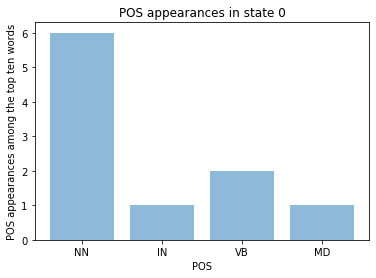

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[0, 1, 1, 1, 0, 2, 1, 0, 1, 2]


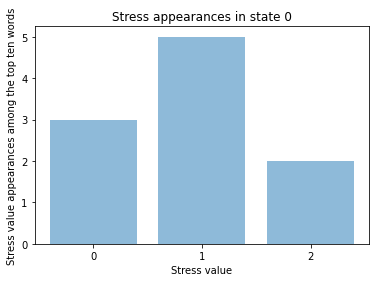

Syllables Analysis
['1', '1', '1', '1', '1', '1', '1', '1', '1', '1']


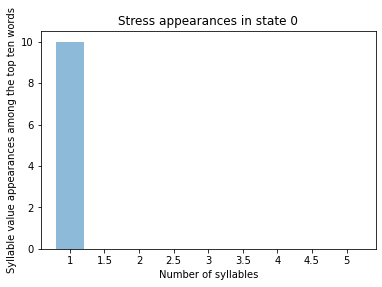

All
['eye', 'time', 'art', 'will', 'see', 'hath', 'world', 'know', 'though', 'thing', 'may', 'love', 'men', 'praise', 'say', 'upon', 'might', 'muse', 'made', 'hate', 'rose', 'sun', 'prove', 'summer', 'must', 'first', 'truth', 'kind', 'find', 'think', 'behold', 'doth', 'look', 'make', 'earth', 'part', 'death', 'better', 'hast', 'treasure', 'need', 'live', 'one', 'best', 'lies', 'beauty', 'strength', 'loss', 'living', 'return']
POS Analysis


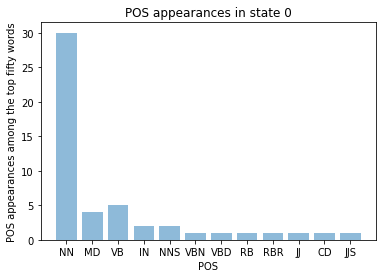

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[2, 1, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 2, 2, 1, 2, 0, 2, 1, 1, 0, 2, 0, 1, 2, 0, 2, 0, 2, 0, 1, 2, 2, 1, 1, 2, 1, 1, 0, 0]


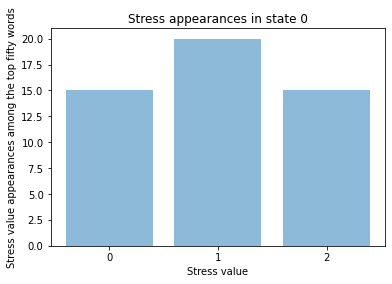

Syllables Analysis
['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1.5', '1', '1.5', '1', '1', '1', '1', '1', '2', '1', '1', '2', '2']


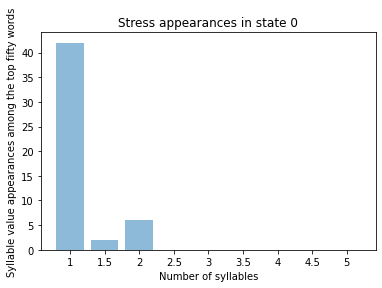

state: 1
Top Ten
['shouldst', 'mayst', 'sad', 'shalt', 'even', 'now', 'dost', 'wilt', 'art', 'whose']
POS Analysis


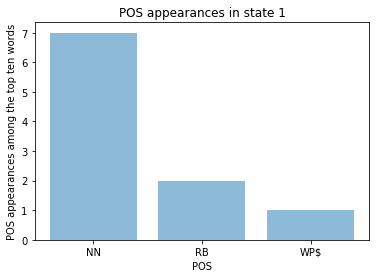

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[2, 0, 0, 2, 0, 2, 0, 0, 0, 2]


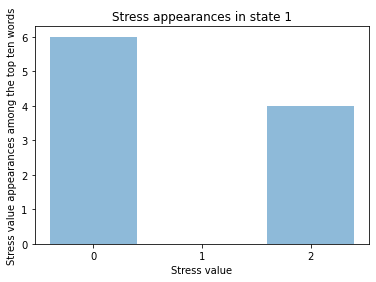

Syllables Analysis
['1', '1', '1', '1', '1.5', '1', '1', '1', '1', '1']


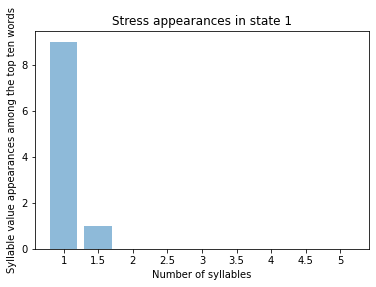

All
['whose', 'art', 'wilt', 'dost', 'now', 'even', 'shalt', 'sad', 'mayst', 'shouldst', 'look', 'hast', 'tired', 'compare', 'save', 'hues', 'full', 'whilst', 'woman', 'alone', 'past', 'better', 'lovst', 'although', 'winter', 'wound', 'perfumes', 'sea', 'works', 'yet', 'beauty', 'sleep', 'least', 'joy', 'bring', 'hath', 'natures', 'slow', 'bounty', 'little', 'feed', 'behind', 'holds', 'ay', 'breathed', 'invention', 'grant', 'didst', 'enjoyer', 'thus']
POS Analysis


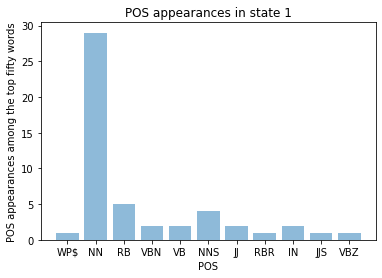

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 1, 2, 0, 2, 0, 2, 0, 1, 0, 1, 1, 2, 2, 1, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 1, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1]


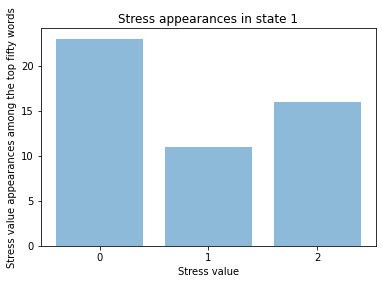

Syllables Analysis
['1', '1', '1', '1', '1', '1.5', '1', '1', '1', '1', '1', '1', '1.5', '2', '1', '1', '1', '1', '2', '2', '1', '1.5', '1', '2', '2', '1', '2', '1', '1', '1', '2', '1', '1', '1', '1', '1', '2', '1', '2', '2', '1', '2', '1', '1', '1', '3', '1', '1', '3', '1']


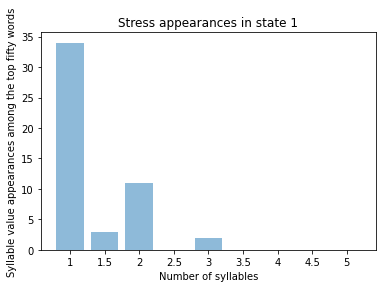

state: 2
Top Ten
['fair', 'new', 'may', 'dear', 'ill', 'true', 'sweet', 'thee', 'doth', 'thy']
POS Analysis


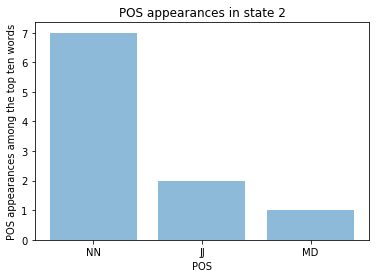

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[1, 1, 0, 0, 1, 0, 2, 2, 2, 0]


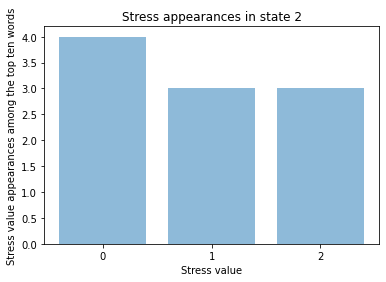

Syllables Analysis
['1', '1', '1', '1', '1', '1', '1', '1', '1', '1']


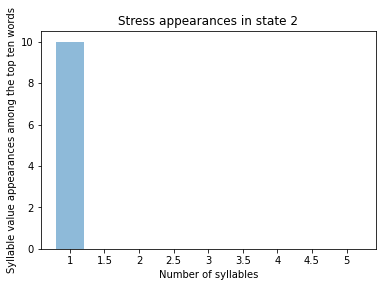

All
['thy', 'doth', 'thee', 'sweet', 'true', 'ill', 'dear', 'may', 'new', 'fair', 'hath', 'alone', 'still', 'every', 'another', 'eye', 'must', 'now', 'will', 'dost', 'seem', 'back', 'part', 'old', 'wide', 'well', 'times', 'bear', 'look', 'bright', 'one', 'full', 'faith', 'die', 'buried', 'minutes', 'tender', 'whose', 'words', 'large', 'woe', 'shame', 'others', 'birth', 'gone', 'swift', 'say', 'wrong', 'gentle', 'never']
POS Analysis


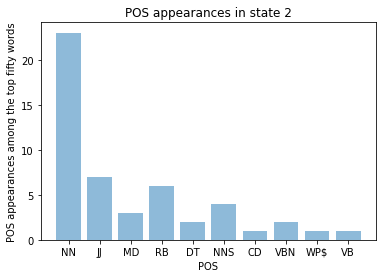

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[0, 2, 2, 2, 0, 1, 0, 0, 1, 1, 0, 0, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 0, 1, 0, 1, 1, 2, 1, 2, 2]


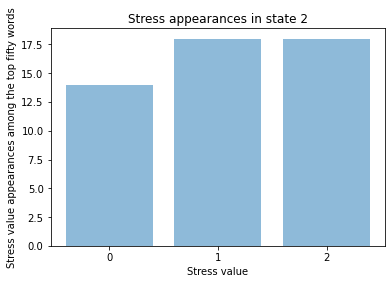

Syllables Analysis
['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '2', '2.5', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2.5', '2', '2', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '2', '1.5']


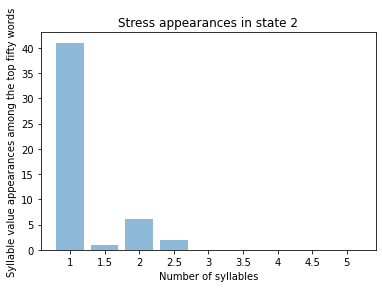

state: 3
Top Ten
['thine', 'even', 'day', 'life', 'thee', 'yet', 'loves', 'one', 'hand', 'mine']
POS Analysis


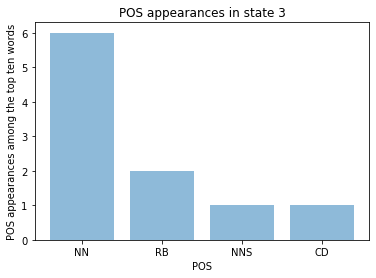

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[1, 0, 0, 0, 2, 0, 0, 2, 1, 1]


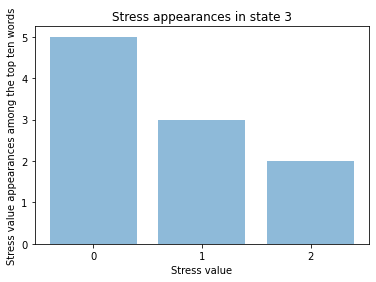

Syllables Analysis
['1', '1.5', '1', '1', '1', '1', '1', '1', '1', '1']


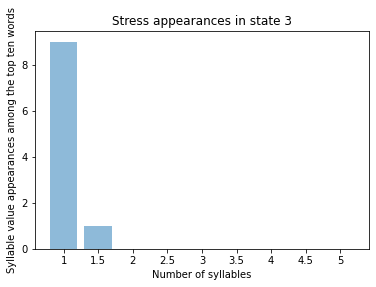

All
['mine', 'hand', 'one', 'loves', 'yet', 'thee', 'life', 'day', 'even', 'thine', 'thus', 'part', 'mistress', 'come', 'angel', 'well', 'state', 'heaven', 'due', 'silence', 'keep', 'decay', 'happy', 'death', 'bosoms', 'stand', 'write', 'better', 'seen', 'turns', 'forgot', 'best', 'forsworn', 'beauty', 'ten', 'proceed', 'wit', 'eclipse', 'praise', 'turned', 'cruel', 'slight', 'knife', 'doom', 'therefore', 'pleasing', 'errors', 'bear', 'removed', 'jewel']
POS Analysis


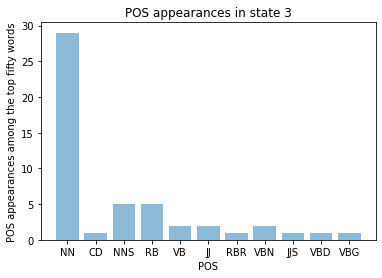

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[1, 1, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 2, 1, 1, 2, 1, 1, 0, 0, 0, 2, 2, 2, 1, 1, 0, 2, 0, 0, 1, 2, 2, 1, 1, 1, 1, 0, 0, 1, 2, 2, 1, 2, 2, 0, 0, 0, 1]


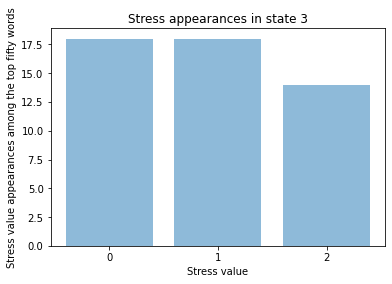

Syllables Analysis
['1', '1', '1', '1', '1', '1', '1', '1', '1.5', '1', '1', '1', '2', '1', '2', '1', '1', '1.5', '1', '2', '1', '2', '2', '1', '2', '1', '1', '1.5', '1', '1', '2', '1', '2', '2', '1', '2', '1', '2', '1', '1', '1.5', '1', '1', '1', '2', '2', '2', '1', '2', '1.5']


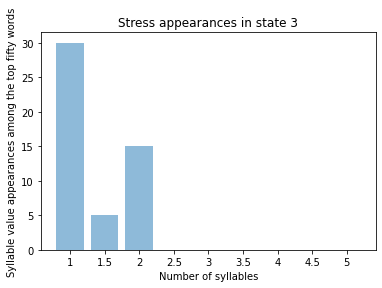

state: 4
Top Ten
['hold', 'lest', 'spent', 'crime', 'yet', 'remain', 'bearing', 'night', 'alone', 'whilst']
POS Analysis


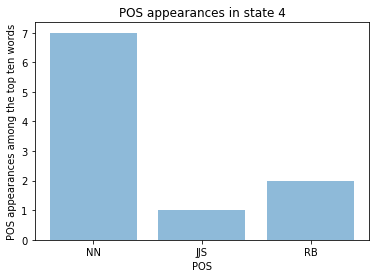

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[0, 0, 1, 0, 0, 0, 2, 2, 0, 0]


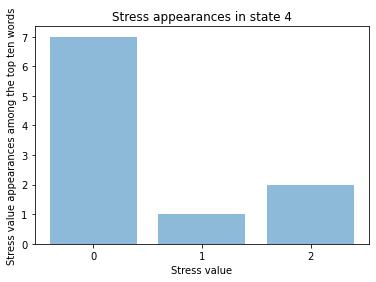

Syllables Analysis
['1', '1', '1', '1', '1', '2', '1.5', '1', '2', '1']


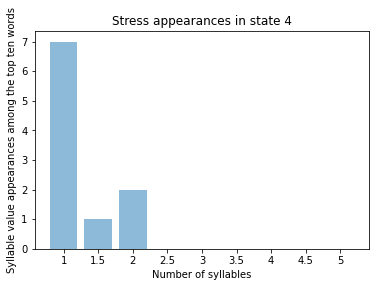

All
['whilst', 'alone', 'night', 'bearing', 'remain', 'yet', 'crime', 'spent', 'lest', 'hold', 'save', 'sense', 'away', 'poor', 'though', 'came', 'say', 'without', 'let', 'alas', 'desert', 'hath', 'frame', 'whereto', 'living', 'sets', 'shows', 'doth', 'want', 'dyed', 'store', 'minds', 'subtleties', 'creatures', 'call', 'age', 'grounded', 'excuse', 'bring', 'report', 'resembling', 'sounds', 'posterity', 'wealth', 'things', 'upon', 'sap', 'alchemy', 'slandering', 'making']
POS Analysis


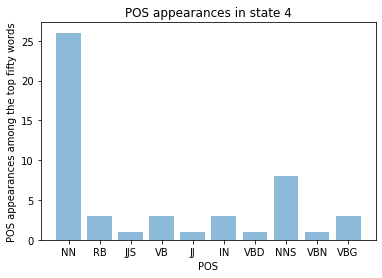

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 1, 0, 0]


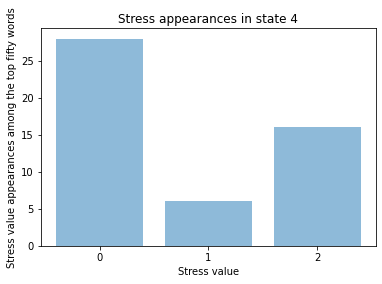

Syllables Analysis
['1', '2', '1', '1.5', '2', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '2', '1', '2', '2', '1', '1', '2', '2', '1', '1', '1', '1', '1', '1', '1', '3', '2', '1', '1', '2', '2', '1', '2', '3', '1', '4', '1', '1', '2', '1', '3', '2', '1.5']


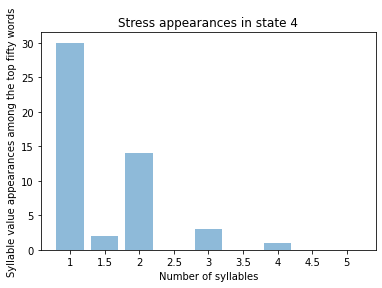

state: 5
Top Ten
['say', 'live', 'worth', 'self', 'every', 'give', 'show', 'yet', 'thee', 'make']
POS Analysis


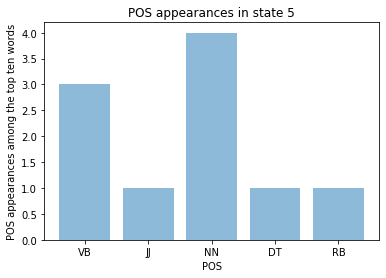

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[2, 2, 0, 1, 2, 2, 0, 0, 2, 1]


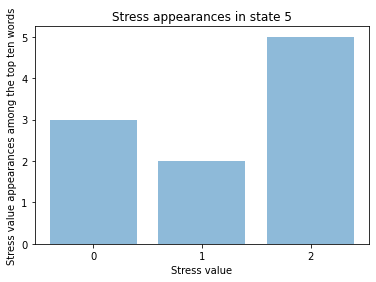

Syllables Analysis
['1', '1', '1', '1', '2', '1', '1', '1', '1', '1']


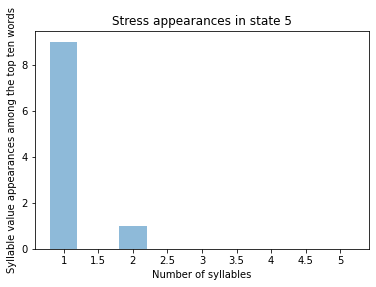

All
['make', 'thee', 'yet', 'show', 'give', 'every', 'self', 'worth', 'live', 'say', 'let', 'face', 'beauty', 'take', 'still', 'tis', 'love', 'though', 'pity', 'grace', 'lies', 'know', 'evil', 'nothing', 'time', 'use', 'set', 'made', 'high', 'cheek', 'heart', 'end', 'shape', 'put', 'old', 'see', 'deep', 'call', 'flower', 'best', 'change', 'dead', 'part', 'shade', 'treasure', 'true', 'lest', 'believe', 'touches', 'thought']
POS Analysis


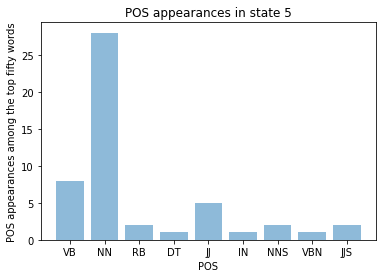

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[1, 2, 0, 0, 2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 0, 2, 0, 0, 1, 1, 2, 1, 0, 1, 0, 0, 0, 0, 2, 1]


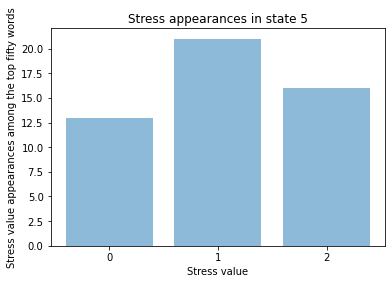

Syllables Analysis
['1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1.5', '1.5', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1.5', '1', '1', '2', '2', '1']


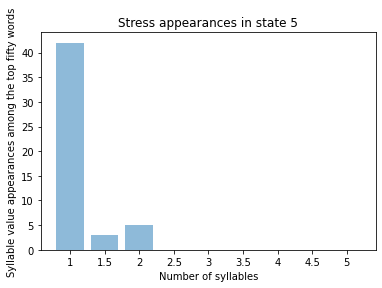

state: 6
Top Ten
['fair', 'loves', 'nothing', 'upon', 'day', 'doth', 'will', 'sweet', 'beauty', 'thy']
POS Analysis


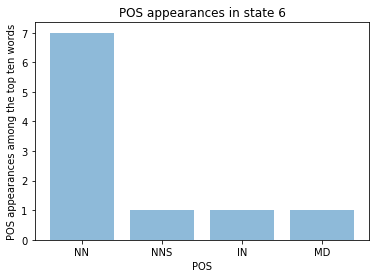

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[1, 0, 1, 2, 0, 2, 1, 2, 2, 0]


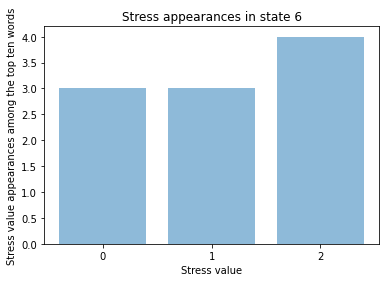

Syllables Analysis
['1', '1', '1.5', '2', '1', '1', '1', '1', '2', '1']


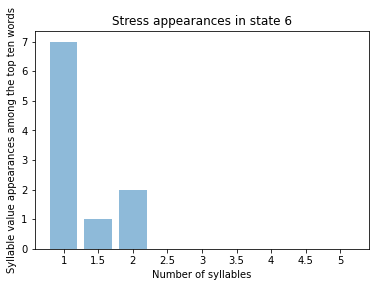

All
['thy', 'beauty', 'sweet', 'will', 'doth', 'day', 'upon', 'nothing', 'loves', 'fair', 'long', 'leave', 'tongue', 'let', 'steal', 'look', 'night', 'loving', 'making', 'proud', 'heart', 'name', 'thought', 'th', 'mind', 'poor', 'summer', 'thinking', 'lives', 'complexion', 'comment', 'side', 'gain', 'strange', 'painting', 'brass', 'beloved', 'great', 'gross', 'never', 'kill', 'new', 'friend', 'ah', 'sooner', 'bodys', 'longer', 'judgement', 'fading', 'follow']
POS Analysis


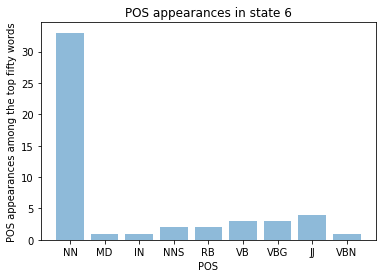

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[0, 2, 2, 1, 2, 0, 2, 1, 0, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 0, 2, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 1, 0, 0, 2, 2, 1, 1, 2, 1]


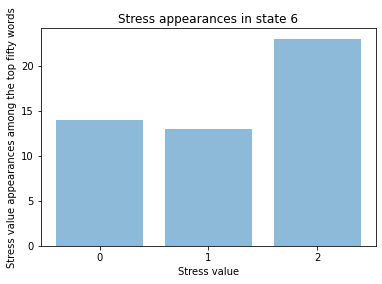

Syllables Analysis
['1', '2', '1', '1', '1', '1', '2', '1.5', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1.5', '1.5', '1', '1', '1', '1', '0', '1', '1', '2', '2', '1', '3', '1.5', '1', '1', '1', '2', '1', '2.5', '1', '1', '1.5', '1', '1', '1', '1', '2', '2', '1.5', '2', '2', '2']


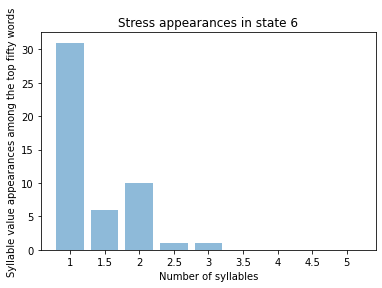

state: 7
Top Ten
['unless', 'within', 'beauteous', 'fair', 'dost', 'till', 'now', 'many', 'thy', 'thou']
POS Analysis


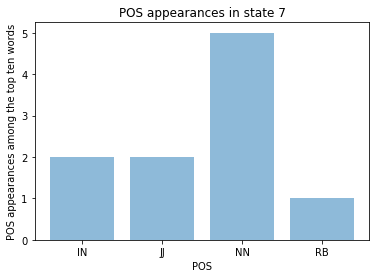

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[0, 0, 1, 1, 0, 0, 2, 1, 0, 1]


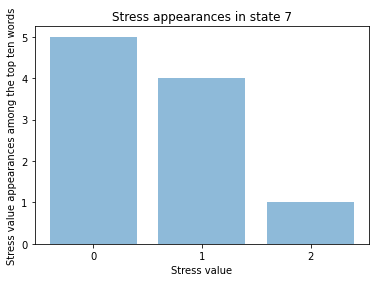

Syllables Analysis
['2', '2', '2', '1', '1', '1', '1', '1.5', '1', '1']


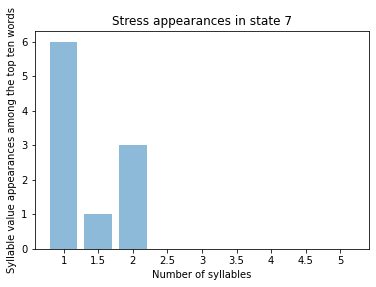

All
['thou', 'thy', 'many', 'now', 'till', 'dost', 'fair', 'beauteous', 'within', 'unless', 'yet', 'taught', 'far', 'keeps', 'though', 'bear', 'take', 'away', 'age', 'find', 'forth', 'care', 'fast', 'hast', 'gentle', 'thus', 'left', 'bad', 'wherein', 'bareness', 'suffer', 'oer', 'art', 'fond', 'thence', 'spirit', 'flatter', 'oft', 'towards', 'toil', 'one', 'fresh', 'hour', 'hate', 'drinks', 'grew', 'proved', 'even', 'true', 'prove']
POS Analysis


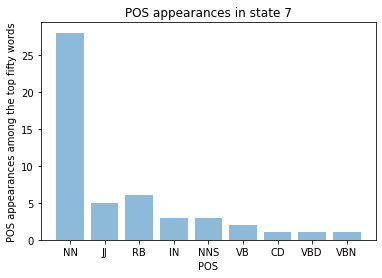

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[1, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 2, 0, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 0, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 0, 1, 1, 0, 0, 2]


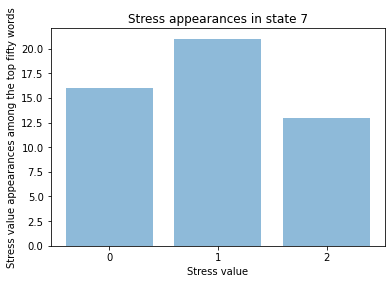

Syllables Analysis
['1', '1', '1.5', '1', '1', '1', '1', '2', '2', '2', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '2', '2', '2', '1', '1', '1', '1', '1.5', '1.5', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1.5', '1', '1']


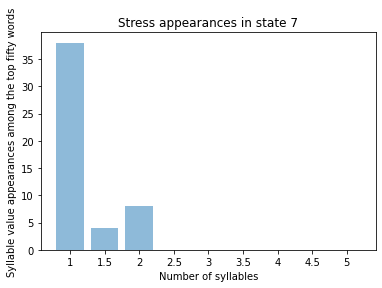

state: 8
Top Ten
['might', 'time', 'verse', 'thought', 'beauty', 'sight', 'thee', 'heart', 'self', 'love']
POS Analysis


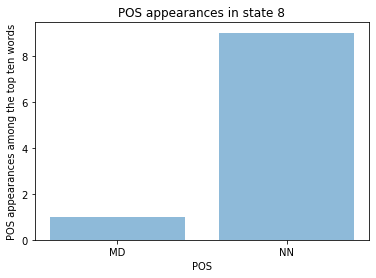

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[0, 1, 2, 1, 2, 2, 2, 1, 1, 1]


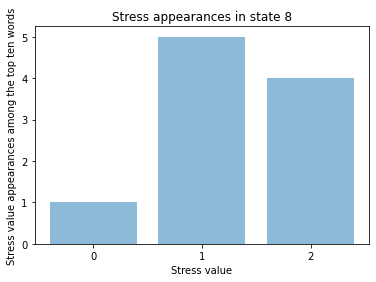

Syllables Analysis
['1', '1', '1', '1', '2', '1', '1', '1', '1', '1']


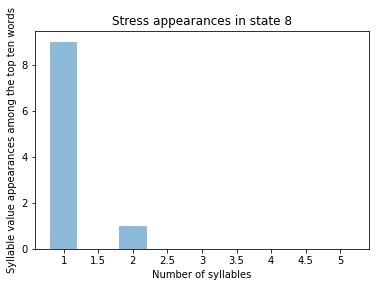

All
['love', 'self', 'heart', 'thee', 'sight', 'beauty', 'thought', 'verse', 'time', 'might', 'will', 'mind', 'lie', 'good', 'days', 'friend', 'live', 'pleasure', 'thine', 'much', 'deeds', 'soul', 'come', 'tell', 'praise', 'pen', 'skill', 'false', 'stay', 'world', 'name', 'sake', 'head', 'still', 'two', 'sing', 'child', 'death', 'sin', 'breast', 'eye', 'shame', 'life', 'truth', 'place', 'state', 'glass', 'light', 'give', 'way']
POS Analysis


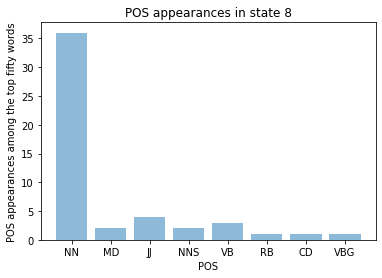

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 1, 1, 2, 0, 0, 0, 2, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 0, 0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2]


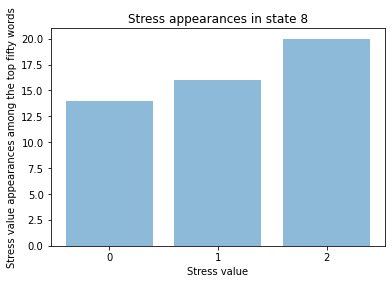

Syllables Analysis
['1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1.5', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']


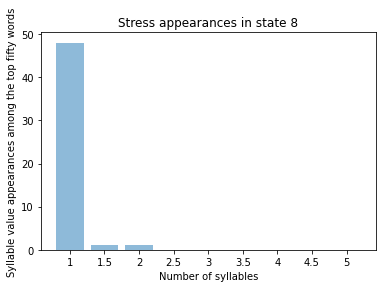

state: 9
Top Ten
['still', 'summer', 'youth', 'one', 'therefore', 'time', 'thine', 'mine', 'thee', 'thou']
POS Analysis


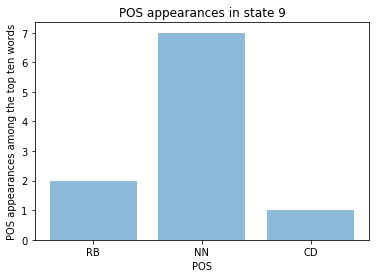

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[2, 2, 1, 2, 2, 1, 1, 1, 2, 1]


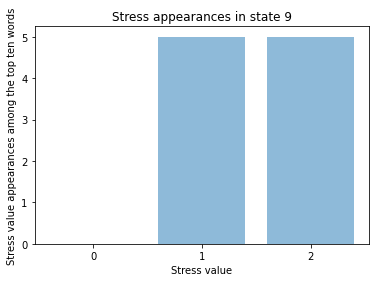

Syllables Analysis
['1', '2', '1', '1', '2', '1', '1', '1', '1', '1']


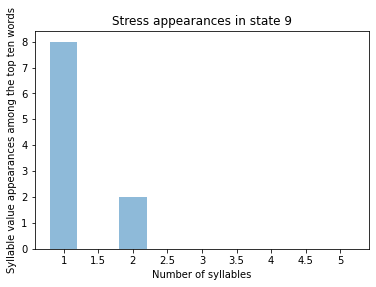

All
['thou', 'thee', 'mine', 'thine', 'time', 'therefore', 'one', 'youth', 'summer', 'still', 'whether', 'love', 'others', 'old', 'nature', 'sorrow', 'men', 'black', 'away', 'lips', 'die', 'murdrous', 'blood', 'heavy', 'three', 'gives', 'war', 'death', 'ten', 'now', 'though', 'slave', 'deep', 'abundance', 'excuse', 'joy', 'lover', 'false', 'power', 'truth', 'despite', 'oft', 'praise', 'weep', 'stone', 'odour', 'keep', 'water', 'two', 'numbers']
POS Analysis


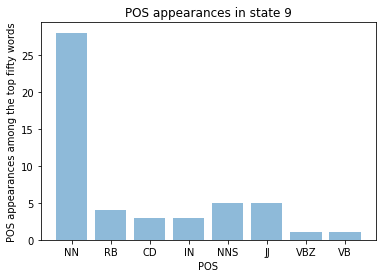

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 0, 2, 1, 2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 2, 0]


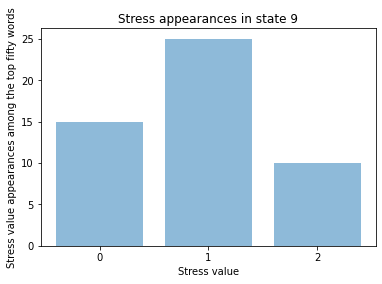

Syllables Analysis
['1', '1', '1', '1', '1', '2', '1', '1', '2', '1', '1.5', '1', '2', '1', '2', '1.5', '1', '1', '2', '1', '1', '2', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '3', '2', '1', '1.5', '1', '1', '1', '2', '1', '1', '1', '1', '2', '1', '2', '1', '2']


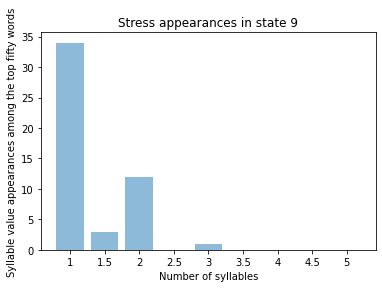

In [0]:
for i in range(len(wordclouds)):
  print("state: " + str(i))
  topTen, topAll = sortWordCloud(wordclouds[i])
  print("Top Ten")
  print(topTen)
  print("POS Analysis")
  posList = [nltk.pos_tag(nltk.word_tokenize(each))[0][1] for each in topTen]
  posFreq = {}
  for j in range(len(posList)):
    if posList[j] not in posFreq:
      posFreq[posList[j]] = 1
    else:
      posFreq[posList[j]] += 1
  
  objects = tuple(posFreq.keys())
  y_pos = np.arange(len(objects))
  freqs = posFreq.values()

  plt.bar(y_pos, freqs, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('POS appearances among the top ten words')
  plt.xlabel('POS')
  plt.title('POS appearances in state ' + str(i))
  plt.savefig("subsetPOS"+str(i)+".png")
  plt.show()
  print("Stress Analysis")
  print("0 means unstress, 1 means stress, 2 means appeared as both")
  stresses = [dictOfStresses[each] if each in dictOfStresses else each + ": not found" for each in topTen]
  print([dictOfStresses[each] if each in dictOfStresses else each + ": not found" for each in topTen])
  stressesFreq = {0: 0, 1: 0, 2: 0}
  for j in range(len(stresses)):
    if stresses[j] in stressesFreq:
      stressesFreq[stresses[j]] += 1
  
  objects = tuple(stressesFreq.keys())
  y_pos = np.arange(len(objects))
  freqs = stressesFreq.values()

  plt.bar(y_pos, freqs, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('Stress value appearances among the top ten words')
  plt.xlabel('Stress value')
  plt.title('Stress appearances in state ' + str(i))
  plt.savefig("subsetStress"+str(i)+".png")
  plt.show()
  print("Syllables Analysis")
  syllbs = [syllableList[each] if each in syllableList else each + ": not found" for each in topTen]
  print([syllableList[each] if each in syllableList else each + ": not found" for each in topTen])
  sbFreq = {'1': 0, '1.5':0, '2': 0, '2.5':0, '3': 0, '3.5':0, '4':0, '4.5':0, '5':0}
  for j in range(len(syllbs)):
    if syllbs[j] in sbFreq:
      sbFreq[syllbs[j]] += 1
  
  objects = tuple(sbFreq.keys())
  y_pos = np.arange(len(objects))
  freqs = sbFreq.values()

  plt.bar(y_pos, freqs, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('Syllable value appearances among the top ten words')
  plt.xlabel('Number of syllables')
  plt.title('Stress appearances in state ' + str(i))
  plt.savefig("subsetSyllables"+str(i)+".png")
  plt.show()

  print("All")
  print(topAll)
  print("POS Analysis")
  posList = [nltk.pos_tag(nltk.word_tokenize(each))[0][1] for each in topAll]
  posFreq = {}
  for j in range(len(posList)):
    if posList[j] not in posFreq:
      posFreq[posList[j]] = 1
    else:
      posFreq[posList[j]] += 1
  
  objects = tuple(posFreq.keys())
  y_pos = np.arange(len(objects))
  freqs = posFreq.values()

  plt.bar(y_pos, freqs, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('POS appearances among the top fifty words')
  plt.xlabel('POS')
  plt.title('POS appearances in state ' + str(i))
  plt.savefig("fullPOS"+str(i)+".png")
  plt.show()
  print("Stress Analysis")
  print("0 means unstress, 1 means stress, 2 means appeared as both")
  stresses = [dictOfStresses[each] if each in dictOfStresses else each + ": not found" for each in topAll]
  print([dictOfStresses[each] if each in dictOfStresses else each + ": not found" for each in topAll])
  stressesFreq = {0: 0, 1: 0, 2: 0}
  for j in range(len(stresses)):
    if stresses[j] in stressesFreq:
      stressesFreq[stresses[j]] += 1
  
  objects = tuple(stressesFreq.keys())
  y_pos = np.arange(len(objects))
  freqs = stressesFreq.values()

  plt.bar(y_pos, freqs, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('Stress value appearances among the top fifty words')
  plt.xlabel('Stress value')
  plt.title('Stress appearances in state ' + str(i))
  plt.savefig("fullStress"+str(i)+".png")
  plt.show()
  print("Syllables Analysis")
  syllbs = []
  #for each in topAll:
  #  if each in syllableList:
  #    syllbs.append(syllableList[each])
  #  else:
  #    print(each)
  #    if each == 'ay':
  #      print(syllableList[each])
  syllbs = [syllableList[each] if each in syllableList else each + ": not found" for each in topAll]
  print([syllableList[each] if each in syllableList else each + ": not found" for each in topAll])
  sbFreq = {'1': 0, '1.5':0, '2': 0, '2.5':0, '3': 0, '3.5':0, '4':0, '4.5':0, '5':0}
  for j in range(len(syllbs)):
    if syllbs[j] in sbFreq:
      sbFreq[syllbs[j]] += 1
  
  objects = tuple(sbFreq.keys())
  y_pos = np.arange(len(objects))
  freqs = sbFreq.values()

  plt.bar(y_pos, freqs, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('Syllable value appearances among the top fifty words')
  plt.xlabel('Number of syllables')
  plt.title('Stress appearances in state ' + str(i))
  plt.savefig("fullSyllables"+str(i)+".png")
  plt.show()

state: 0
Top Ten
['thing', 'though', 'know', 'world', 'hath', 'see', 'will', 'art', 'time', 'eye']
POS Analysis


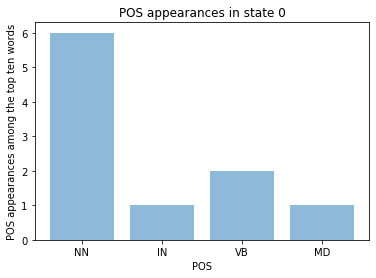

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[0, 1, 1, 1, 0, 2, 1, 0, 1, 2]


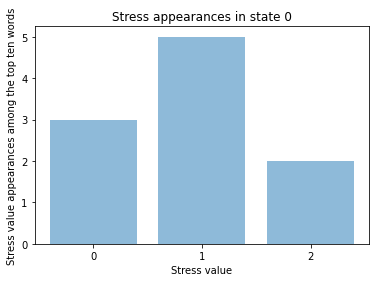

Syllables Analysis
['1', '1', '1', '1', '1', '1', '1', '1', '1', '1']


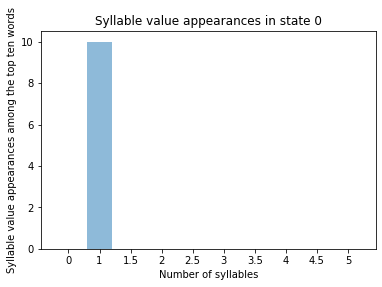

All
['eye', 'time', 'art', 'will', 'see', 'hath', 'world', 'know', 'though', 'thing', 'may', 'love', 'men', 'praise', 'say', 'upon', 'might', 'muse', 'made', 'hate', 'rose', 'sun', 'prove', 'summer', 'must', 'first', 'truth', 'kind', 'find', 'think', 'behold', 'doth', 'look', 'make', 'earth', 'part', 'death', 'better', 'hast', 'treasure', 'need', 'live', 'one', 'best', 'lies', 'beauty', 'strength', 'loss', 'living', 'return']
POS Analysis


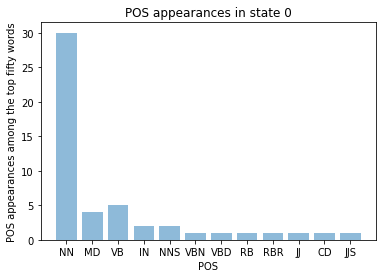

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[2, 1, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 2, 2, 1, 2, 0, 2, 1, 1, 0, 2, 0, 1, 2, 0, 2, 0, 2, 0, 1, 2, 2, 1, 1, 2, 1, 1, 0, 0]


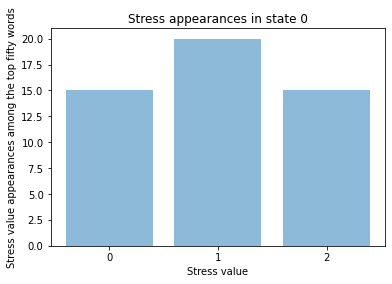

Syllables Analysis
['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1.5', '1', '1.5', '1', '1', '1', '1', '1', '2', '1', '1', '2', '2']


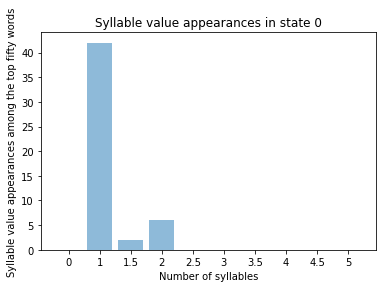

state: 1
Top Ten
['shouldst', 'mayst', 'sad', 'shalt', 'even', 'now', 'dost', 'wilt', 'art', 'whose']
POS Analysis


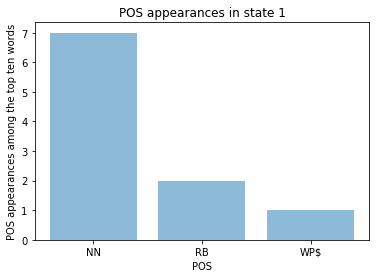

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[2, 0, 0, 2, 0, 2, 0, 0, 0, 2]


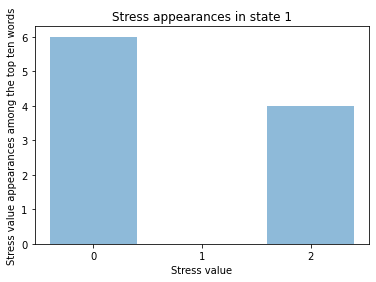

Syllables Analysis
['1', '1', '1', '1', '1.5', '1', '1', '1', '1', '1']


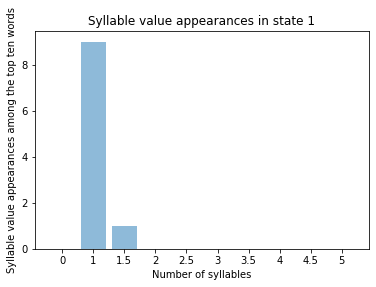

All
['whose', 'art', 'wilt', 'dost', 'now', 'even', 'shalt', 'sad', 'mayst', 'shouldst', 'look', 'hast', 'tired', 'compare', 'save', 'hues', 'full', 'whilst', 'woman', 'alone', 'past', 'better', 'lovst', 'although', 'winter', 'wound', 'perfumes', 'sea', 'works', 'yet', 'beauty', 'sleep', 'least', 'joy', 'bring', 'hath', 'natures', 'slow', 'bounty', 'little', 'feed', 'behind', 'holds', 'ay', 'breathed', 'invention', 'grant', 'didst', 'enjoyer', 'thus']
POS Analysis


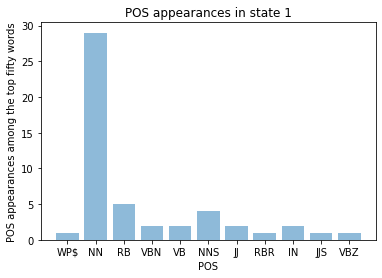

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 1, 2, 0, 2, 0, 2, 0, 1, 0, 1, 1, 2, 2, 1, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 1, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1]


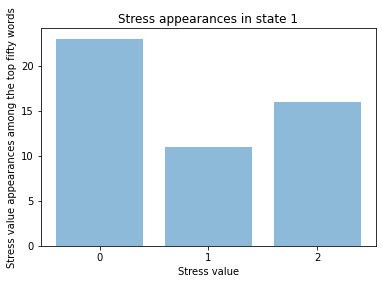

Syllables Analysis
['1', '1', '1', '1', '1', '1.5', '1', '1', '1', '1', '1', '1', '1.5', '2', '1', '1', '1', '1', '2', '2', '1', '1.5', '1', '2', '2', '1', '2', '1', '1', '1', '2', '1', '1', '1', '1', '1', '2', '1', '2', '2', '1', '2', '1', '1', '1', '3', '1', '1', '3', '1']


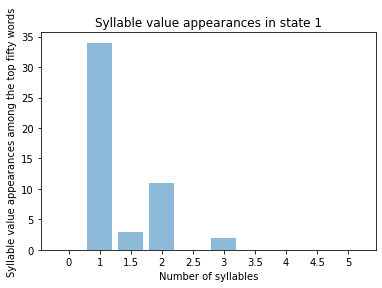

state: 2
Top Ten
['fair', 'new', 'may', 'dear', 'ill', 'true', 'sweet', 'thee', 'doth', 'thy']
POS Analysis


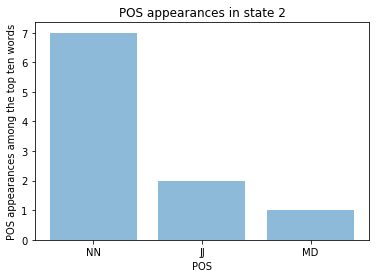

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[1, 1, 0, 0, 1, 0, 2, 2, 2, 0]


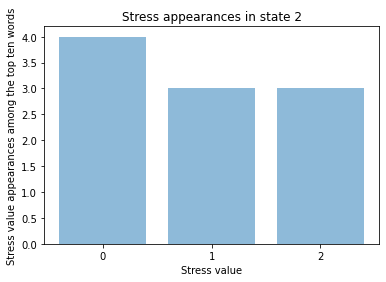

Syllables Analysis
['1', '1', '1', '1', '1', '1', '1', '1', '1', '1']


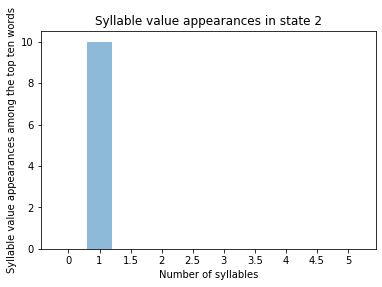

All
['thy', 'doth', 'thee', 'sweet', 'true', 'ill', 'dear', 'may', 'new', 'fair', 'hath', 'alone', 'still', 'every', 'another', 'eye', 'must', 'now', 'will', 'dost', 'seem', 'back', 'part', 'old', 'wide', 'well', 'times', 'bear', 'look', 'bright', 'one', 'full', 'faith', 'die', 'buried', 'minutes', 'tender', 'whose', 'words', 'large', 'woe', 'shame', 'others', 'birth', 'gone', 'swift', 'say', 'wrong', 'gentle', 'never']
POS Analysis


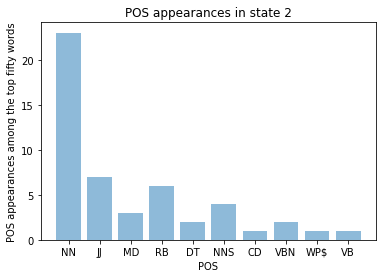

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[0, 2, 2, 2, 0, 1, 0, 0, 1, 1, 0, 0, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 0, 1, 0, 1, 1, 2, 1, 2, 2]


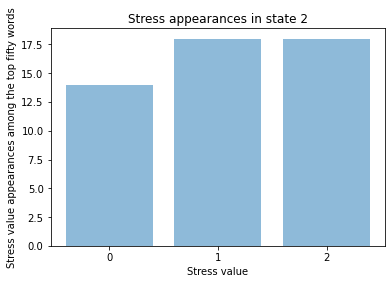

Syllables Analysis
['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '2', '2.5', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2.5', '2', '2', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '2', '1.5']


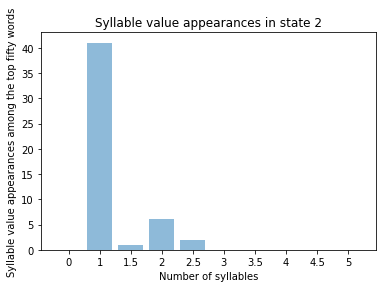

state: 3
Top Ten
['thine', 'even', 'day', 'life', 'thee', 'yet', 'loves', 'one', 'hand', 'mine']
POS Analysis


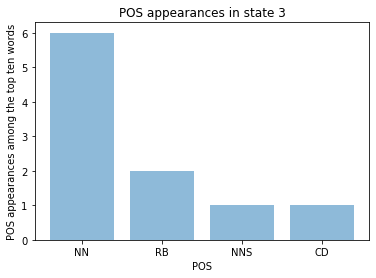

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[1, 0, 0, 0, 2, 0, 0, 2, 1, 1]


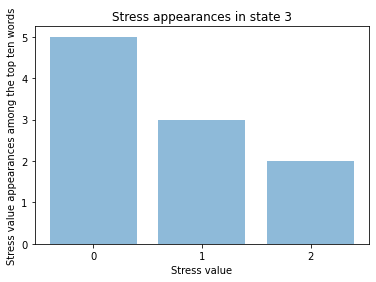

Syllables Analysis
['1', '1.5', '1', '1', '1', '1', '1', '1', '1', '1']


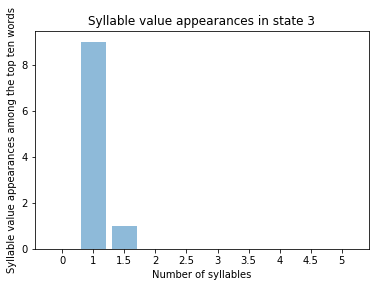

All
['mine', 'hand', 'one', 'loves', 'yet', 'thee', 'life', 'day', 'even', 'thine', 'thus', 'part', 'mistress', 'come', 'angel', 'well', 'state', 'heaven', 'due', 'silence', 'keep', 'decay', 'happy', 'death', 'bosoms', 'stand', 'write', 'better', 'seen', 'turns', 'forgot', 'best', 'forsworn', 'beauty', 'ten', 'proceed', 'wit', 'eclipse', 'praise', 'turned', 'cruel', 'slight', 'knife', 'doom', 'therefore', 'pleasing', 'errors', 'bear', 'removed', 'jewel']
POS Analysis


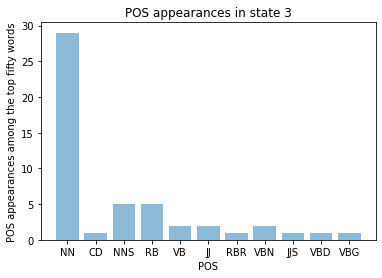

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[1, 1, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 2, 1, 1, 2, 1, 1, 0, 0, 0, 2, 2, 2, 1, 1, 0, 2, 0, 0, 1, 2, 2, 1, 1, 1, 1, 0, 0, 1, 2, 2, 1, 2, 2, 0, 0, 0, 1]


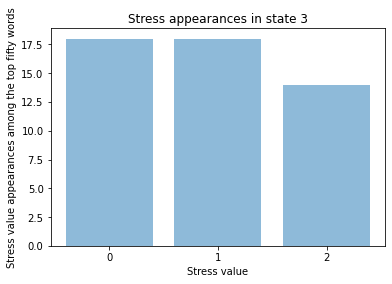

Syllables Analysis
['1', '1', '1', '1', '1', '1', '1', '1', '1.5', '1', '1', '1', '2', '1', '2', '1', '1', '1.5', '1', '2', '1', '2', '2', '1', '2', '1', '1', '1.5', '1', '1', '2', '1', '2', '2', '1', '2', '1', '2', '1', '1', '1.5', '1', '1', '1', '2', '2', '2', '1', '2', '1.5']


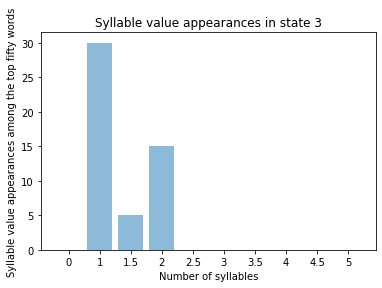

state: 4
Top Ten
['hold', 'lest', 'spent', 'crime', 'yet', 'remain', 'bearing', 'night', 'alone', 'whilst']
POS Analysis


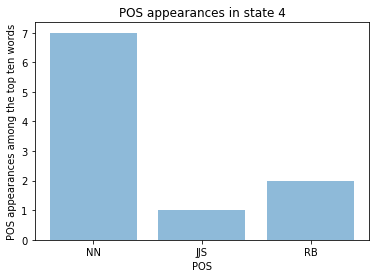

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[0, 0, 1, 0, 0, 0, 2, 2, 0, 0]


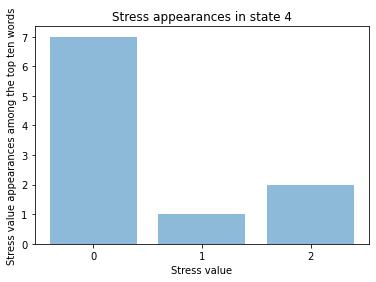

Syllables Analysis
['1', '1', '1', '1', '1', '2', '1.5', '1', '2', '1']


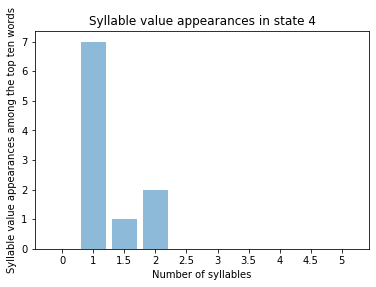

All
['whilst', 'alone', 'night', 'bearing', 'remain', 'yet', 'crime', 'spent', 'lest', 'hold', 'save', 'sense', 'away', 'poor', 'though', 'came', 'say', 'without', 'let', 'alas', 'desert', 'hath', 'frame', 'whereto', 'living', 'sets', 'shows', 'doth', 'want', 'dyed', 'store', 'minds', 'subtleties', 'creatures', 'call', 'age', 'grounded', 'excuse', 'bring', 'report', 'resembling', 'sounds', 'posterity', 'wealth', 'things', 'upon', 'sap', 'alchemy', 'slandering', 'making']
POS Analysis


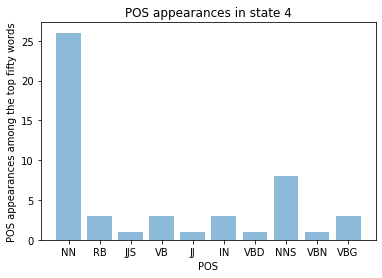

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 1, 0, 0]


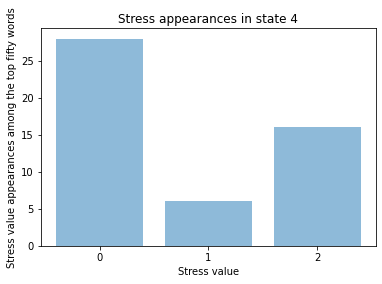

Syllables Analysis
['1', '2', '1', '1.5', '2', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '2', '1', '2', '2', '1', '1', '2', '2', '1', '1', '1', '1', '1', '1', '1', '3', '2', '1', '1', '2', '2', '1', '2', '3', '1', '4', '1', '1', '2', '1', '3', '2', '1.5']


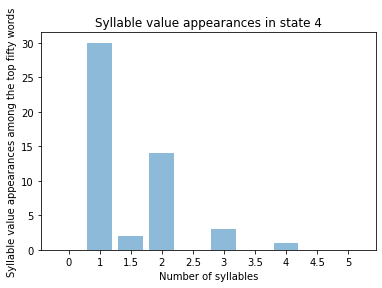

state: 5
Top Ten
['say', 'live', 'worth', 'self', 'every', 'give', 'show', 'yet', 'thee', 'make']
POS Analysis


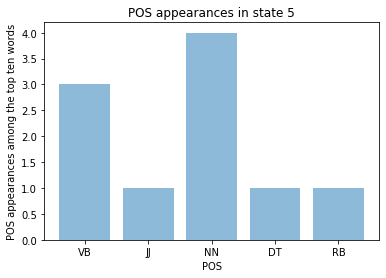

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[2, 2, 0, 1, 2, 2, 0, 0, 2, 1]


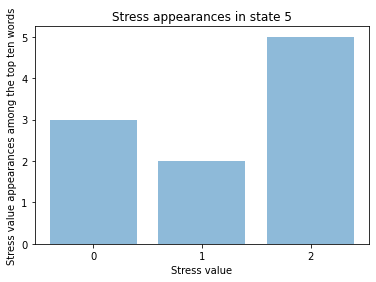

Syllables Analysis
['1', '1', '1', '1', '2', '1', '1', '1', '1', '1']


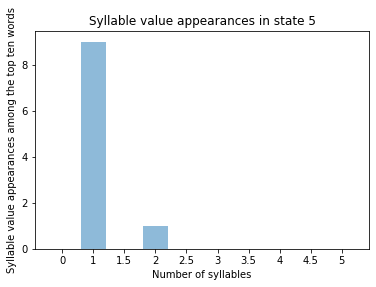

All
['make', 'thee', 'yet', 'show', 'give', 'every', 'self', 'worth', 'live', 'say', 'let', 'face', 'beauty', 'take', 'still', 'tis', 'love', 'though', 'pity', 'grace', 'lies', 'know', 'evil', 'nothing', 'time', 'use', 'set', 'made', 'high', 'cheek', 'heart', 'end', 'shape', 'put', 'old', 'see', 'deep', 'call', 'flower', 'best', 'change', 'dead', 'part', 'shade', 'treasure', 'true', 'lest', 'believe', 'touches', 'thought']
POS Analysis


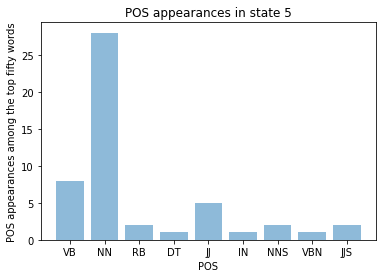

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[1, 2, 0, 0, 2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 0, 2, 0, 0, 1, 1, 2, 1, 0, 1, 0, 0, 0, 0, 2, 1]


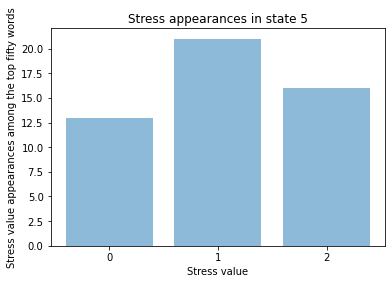

Syllables Analysis
['1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1.5', '1.5', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1.5', '1', '1', '2', '2', '1']


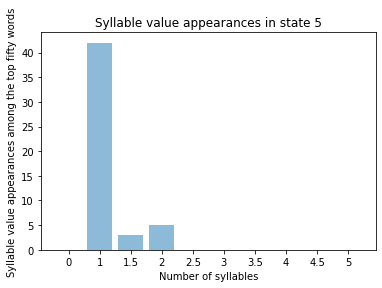

state: 6
Top Ten
['fair', 'loves', 'nothing', 'upon', 'day', 'doth', 'will', 'sweet', 'beauty', 'thy']
POS Analysis


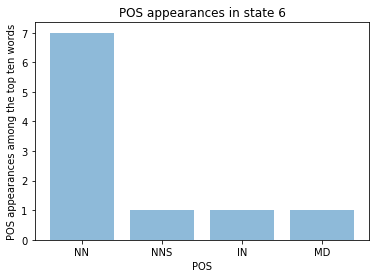

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[1, 0, 1, 2, 0, 2, 1, 2, 2, 0]


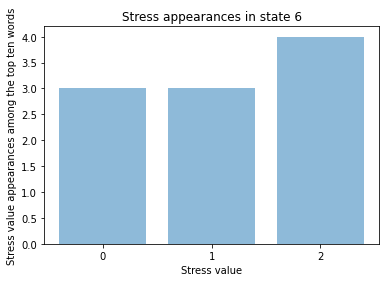

Syllables Analysis
['1', '1', '1.5', '2', '1', '1', '1', '1', '2', '1']


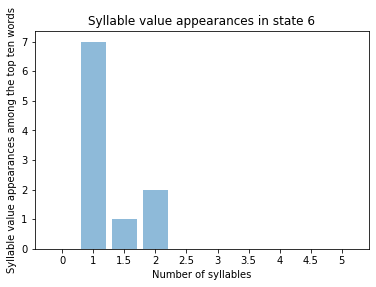

All
['thy', 'beauty', 'sweet', 'will', 'doth', 'day', 'upon', 'nothing', 'loves', 'fair', 'long', 'leave', 'tongue', 'let', 'steal', 'look', 'night', 'loving', 'making', 'proud', 'heart', 'name', 'thought', 'th', 'mind', 'poor', 'summer', 'thinking', 'lives', 'complexion', 'comment', 'side', 'gain', 'strange', 'painting', 'brass', 'beloved', 'great', 'gross', 'never', 'kill', 'new', 'friend', 'ah', 'sooner', 'bodys', 'longer', 'judgement', 'fading', 'follow']
POS Analysis


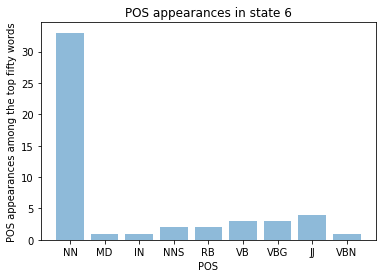

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[0, 2, 2, 1, 2, 0, 2, 1, 0, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 0, 2, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 1, 0, 0, 2, 2, 1, 1, 2, 1]


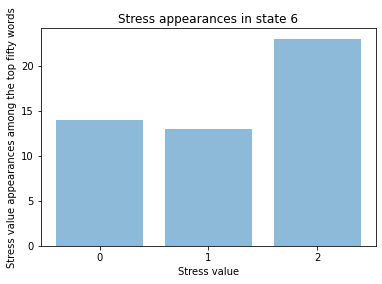

Syllables Analysis
['1', '2', '1', '1', '1', '1', '2', '1.5', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1.5', '1.5', '1', '1', '1', '1', '0', '1', '1', '2', '2', '1', '3', '1.5', '1', '1', '1', '2', '1', '2.5', '1', '1', '1.5', '1', '1', '1', '1', '2', '2', '1.5', '2', '2', '2']


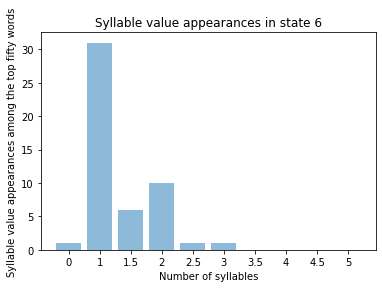

state: 7
Top Ten
['unless', 'within', 'beauteous', 'fair', 'dost', 'till', 'now', 'many', 'thy', 'thou']
POS Analysis


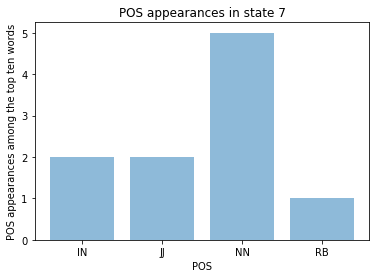

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[0, 0, 1, 1, 0, 0, 2, 1, 0, 1]


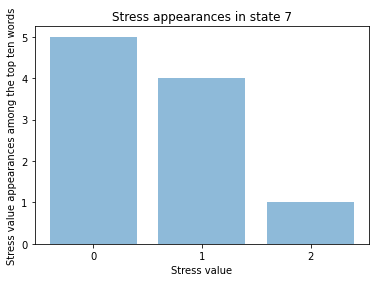

Syllables Analysis
['2', '2', '2', '1', '1', '1', '1', '1.5', '1', '1']


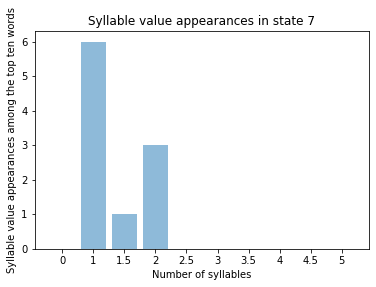

All
['thou', 'thy', 'many', 'now', 'till', 'dost', 'fair', 'beauteous', 'within', 'unless', 'yet', 'taught', 'far', 'keeps', 'though', 'bear', 'take', 'away', 'age', 'find', 'forth', 'care', 'fast', 'hast', 'gentle', 'thus', 'left', 'bad', 'wherein', 'bareness', 'suffer', 'oer', 'art', 'fond', 'thence', 'spirit', 'flatter', 'oft', 'towards', 'toil', 'one', 'fresh', 'hour', 'hate', 'drinks', 'grew', 'proved', 'even', 'true', 'prove']
POS Analysis


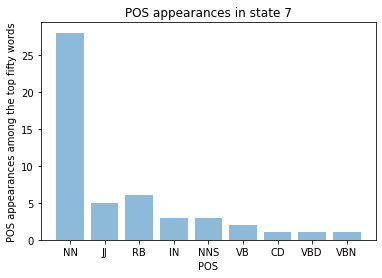

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[1, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 2, 0, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 0, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 0, 1, 1, 0, 0, 2]


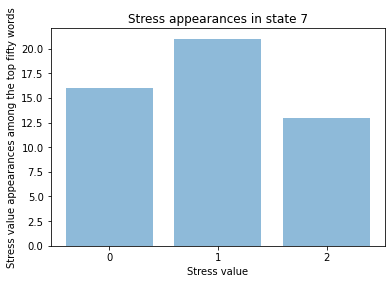

Syllables Analysis
['1', '1', '1.5', '1', '1', '1', '1', '2', '2', '2', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '2', '2', '2', '1', '1', '1', '1', '1.5', '1.5', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1.5', '1', '1']


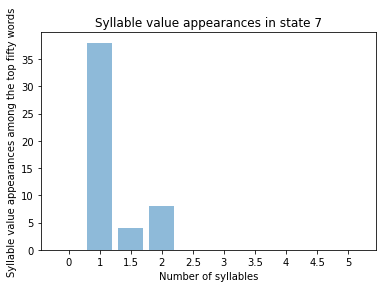

state: 8
Top Ten
['might', 'time', 'verse', 'thought', 'beauty', 'sight', 'thee', 'heart', 'self', 'love']
POS Analysis


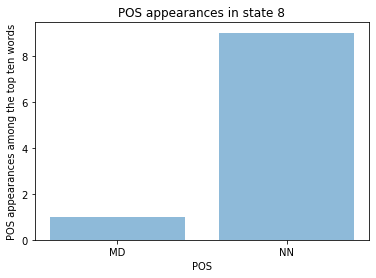

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[0, 1, 2, 1, 2, 2, 2, 1, 1, 1]


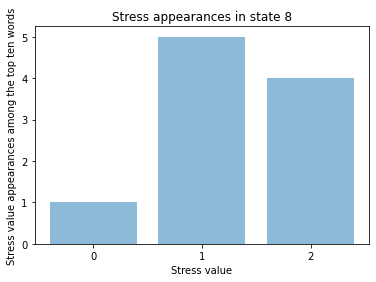

Syllables Analysis
['1', '1', '1', '1', '2', '1', '1', '1', '1', '1']


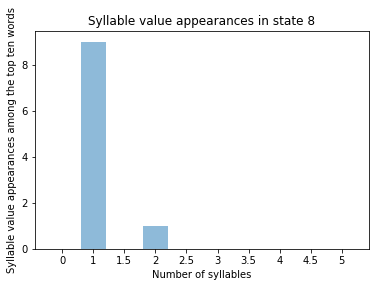

All
['love', 'self', 'heart', 'thee', 'sight', 'beauty', 'thought', 'verse', 'time', 'might', 'will', 'mind', 'lie', 'good', 'days', 'friend', 'live', 'pleasure', 'thine', 'much', 'deeds', 'soul', 'come', 'tell', 'praise', 'pen', 'skill', 'false', 'stay', 'world', 'name', 'sake', 'head', 'still', 'two', 'sing', 'child', 'death', 'sin', 'breast', 'eye', 'shame', 'life', 'truth', 'place', 'state', 'glass', 'light', 'give', 'way']
POS Analysis


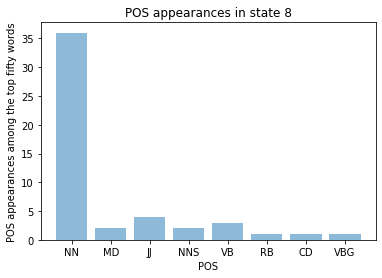

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 1, 1, 2, 0, 0, 0, 2, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 0, 0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2]


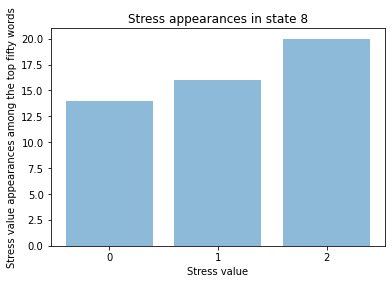

Syllables Analysis
['1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1.5', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']


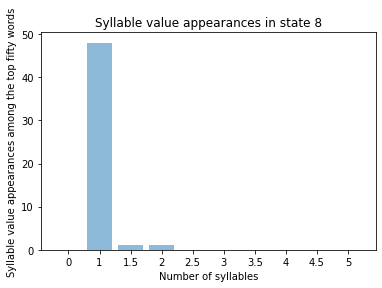

state: 9
Top Ten
['still', 'summer', 'youth', 'one', 'therefore', 'time', 'thine', 'mine', 'thee', 'thou']
POS Analysis


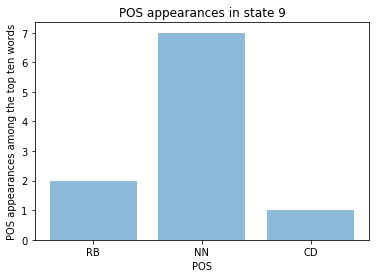

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[2, 2, 1, 2, 2, 1, 1, 1, 2, 1]


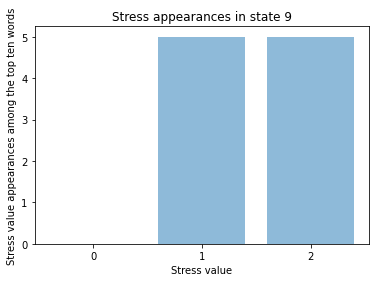

Syllables Analysis
['1', '2', '1', '1', '2', '1', '1', '1', '1', '1']


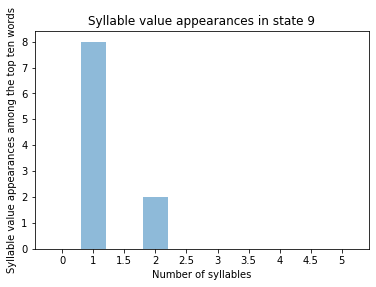

All
['thou', 'thee', 'mine', 'thine', 'time', 'therefore', 'one', 'youth', 'summer', 'still', 'whether', 'love', 'others', 'old', 'nature', 'sorrow', 'men', 'black', 'away', 'lips', 'die', 'murdrous', 'blood', 'heavy', 'three', 'gives', 'war', 'death', 'ten', 'now', 'though', 'slave', 'deep', 'abundance', 'excuse', 'joy', 'lover', 'false', 'power', 'truth', 'despite', 'oft', 'praise', 'weep', 'stone', 'odour', 'keep', 'water', 'two', 'numbers']
POS Analysis


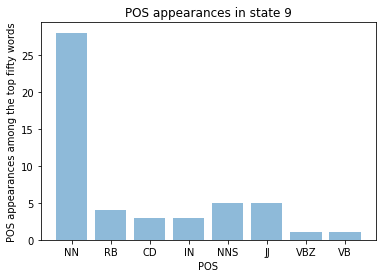

Stress Analysis
0 means unstress, 1 means stress, 2 means appeared as both
[1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 0, 2, 1, 2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 2, 0]


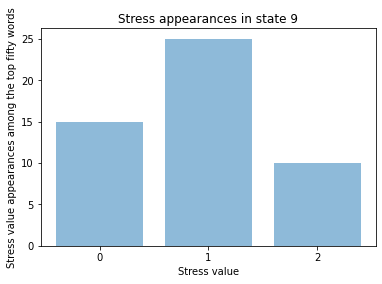

Syllables Analysis
['1', '1', '1', '1', '1', '2', '1', '1', '2', '1', '1.5', '1', '2', '1', '2', '1.5', '1', '1', '2', '1', '1', '2', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '3', '2', '1', '1.5', '1', '1', '1', '2', '1', '1', '1', '1', '2', '1', '2', '1', '2']


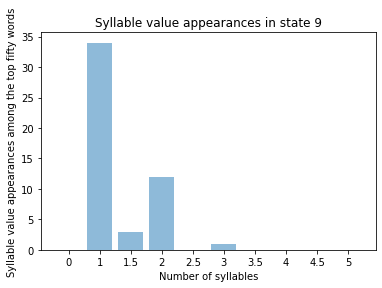

In [19]:
for i in range(len(wordclouds)):
  print("state: " + str(i))
  topTen, topAll = sortWordCloud(wordclouds[i])
  print("Top Ten")
  print(topTen)
  print("POS Analysis")
  posList = [nltk.pos_tag(nltk.word_tokenize(each))[0][1] for each in topTen]
  posFreq = {}
  for j in range(len(posList)):
    if posList[j] not in posFreq:
      posFreq[posList[j]] = 1
    else:
      posFreq[posList[j]] += 1
  
  objects = tuple(posFreq.keys())
  y_pos = np.arange(len(objects))
  freqs = posFreq.values()

  plt.bar(y_pos, freqs, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('POS appearances among the top ten words')
  plt.xlabel('POS')
  plt.title('POS appearances in state ' + str(i))
  plt.savefig("subsetPOS"+str(i)+".png")
  plt.show()
  print("Stress Analysis")
  print("0 means unstress, 1 means stress, 2 means appeared as both")
  stresses = [dictOfStresses[each] if each in dictOfStresses else each + ": not found" for each in topTen]
  print([dictOfStresses[each] if each in dictOfStresses else each + ": not found" for each in topTen])
  stressesFreq = {0: 0, 1: 0, 2: 0}
  for j in range(len(stresses)):
    if stresses[j] in stressesFreq:
      stressesFreq[stresses[j]] += 1
    else:
      print("WARNING")
      print(stresses[j])
      print("WARNING")
  
  objects = tuple(stressesFreq.keys())
  y_pos = np.arange(len(objects))
  freqs = stressesFreq.values()

  plt.bar(y_pos, freqs, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('Stress value appearances among the top ten words')
  plt.xlabel('Stress value')
  plt.title('Stress appearances in state ' + str(i))
  plt.savefig("subsetStress"+str(i)+".png")
  plt.show()
  print("Syllables Analysis")
  syllbs = [syllableList[each] if each in syllableList else each + ": not found" for each in topTen]
  print([syllableList[each] if each in syllableList else each + ": not found" for each in topTen])
  sbFreq = {'0':0, '1': 0, '1.5':0, '2': 0, '2.5':0, '3': 0, '3.5':0, '4':0, '4.5':0, '5':0}
  for j in range(len(syllbs)):
    if syllbs[j] in sbFreq:
      sbFreq[syllbs[j]] += 1
    else:
      print("WARNING")
      print(syllbs[j])
      print("WARNING")
  
  objects = tuple(sbFreq.keys())
  y_pos = np.arange(len(objects))
  freqs = sbFreq.values()

  plt.bar(y_pos, freqs, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('Syllable value appearances among the top ten words')
  plt.xlabel('Number of syllables')
  plt.title('Syllable value appearances in state ' + str(i))
  plt.savefig("subsetSyllables"+str(i)+".png")
  plt.show()

  print("All")
  print(topAll)
  print("POS Analysis")
  posList = [nltk.pos_tag(nltk.word_tokenize(each))[0][1] for each in topAll]
  posFreq = {}
  for j in range(len(posList)):
    if posList[j] not in posFreq:
      posFreq[posList[j]] = 1
    else:
      posFreq[posList[j]] += 1
  
  objects = tuple(posFreq.keys())
  y_pos = np.arange(len(objects))
  freqs = posFreq.values()

  plt.bar(y_pos, freqs, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('POS appearances among the top fifty words')
  plt.xlabel('POS')
  plt.title('POS appearances in state ' + str(i))
  plt.savefig("fullPOS"+str(i)+".png")
  plt.show()
  print("Stress Analysis")
  print("0 means unstress, 1 means stress, 2 means appeared as both")
  stresses = [dictOfStresses[each] if each in dictOfStresses else each + ": not found" for each in topAll]
  print([dictOfStresses[each] if each in dictOfStresses else each + ": not found" for each in topAll])
  stressesFreq = {0: 0, 1: 0, 2: 0}
  for j in range(len(stresses)):
    if stresses[j] in stressesFreq:
      stressesFreq[stresses[j]] += 1
    else:
      print("WARNING")
      print(stresses[j])
      print("WARNING")
  
  objects = tuple(stressesFreq.keys())
  y_pos = np.arange(len(objects))
  freqs = stressesFreq.values()

  plt.bar(y_pos, freqs, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('Stress value appearances among the top fifty words')
  plt.xlabel('Stress value')
  plt.title('Stress appearances in state ' + str(i))
  plt.savefig("fullStress"+str(i)+".png")
  plt.show()
  print("Syllables Analysis")
  syllbs = []
  #for each in topAll:
  #  if each in syllableList:
  #    syllbs.append(syllableList[each])
  #  else:
  #    print(each)
  #    if each == 'ay':
  #      print(syllableList[each])
  syllbs = [syllableList[each] if each in syllableList else each + ": not found" for each in topAll]
  print([syllableList[each] if each in syllableList else each + ": not found" for each in topAll])
  sbFreq = {'0':0, '1': 0, '1.5':0, '2': 0, '2.5':0, '3': 0, '3.5':0, '4':0, '4.5':0, '5':0}
  for j in range(len(syllbs)):
    if syllbs[j] in sbFreq:
      sbFreq[syllbs[j]] += 1
    else:
      print("WARNING")

      print(syllbs[j])
      print("WARNING")
  
  objects = tuple(sbFreq.keys())
  y_pos = np.arange(len(objects))
  freqs = sbFreq.values()

  plt.bar(y_pos, freqs, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('Syllable value appearances among the top fifty words')
  plt.xlabel('Number of syllables')
  plt.title('Syllable value appearances in state ' + str(i))
  plt.savefig("fullSyllables"+str(i)+".png")
  plt.show()